# Pràctica 1C: Anàlisi de les dades

En aquesta primera peça de codi s'importen totes les llibreries necessàries, hi apliquem certes opcions i carreguem el nostre dataset en forma d'array pandas.

In [7]:
# -*- coding: utf-8 -*-

from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sb
%matplotlib notebook
from sklearn.linear_model import LinearRegression

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = pd.read_csv('bike-sharing-dataset/hour.csv', header=0, delimiter=',')


#Omplim
dataset = dataset.fillna(dataset.mean())

print("Dimensionalitat de la BBDD:", dataset.shape)
#print("Dimensionalitat de les entrades X", x.shape)
#print("Dimensionalitat de l'atribut Y", y.shape)


Dimensionalitat de la BBDD: (17379, 17)


In [8]:
print("5 Primeres mostres de la BBDD:")
dataset.head()

5 Primeres mostres de la BBDD:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.240,0.288,0.810,0.000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.220,0.273,0.800,0.000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.220,0.273,0.800,0.000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.240,0.288,0.750,0.000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.240,0.288,0.750,0.000,0,1,1


In [9]:
print("Estadistiques dels atributs numerics de la BBDD:")
dataset.describe()

Estadistiques dels atributs numerics de la BBDD:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000,17379.000
mean,8690.000,2.502,0.503,6.538,11.547,0.029,3.004,0.683,1.425,0.497,0.476,0.627,0.190,35.676,153.787,189.463
std,5017.029,1.107,0.500,3.439,6.914,0.167,2.006,0.465,0.639,0.193,0.172,0.193,0.122,49.305,151.357,181.388
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.020,0.000,0.000,0.000,0.000,0.000,1.000
25%,4345.500,2.000,0.000,4.000,6.000,0.000,1.000,0.000,1.000,0.340,0.333,0.480,0.104,4.000,34.000,40.000
50%,8690.000,3.000,1.000,7.000,12.000,0.000,3.000,1.000,1.000,0.500,0.485,0.630,0.194,17.000,115.000,142.000
75%,13034.500,3.000,1.000,10.000,18.000,0.000,5.000,1.000,2.000,0.660,0.621,0.780,0.254,48.000,220.000,281.000
max,17379.000,4.000,1.000,12.000,23.000,1.000,6.000,1.000,4.000,1.000,1.000,1.000,0.851,367.000,886.000,977.000


#### Aquest primer apartat té com a objectiu respondre les següents preguntes:

1. Quin són els atributs més importants per fer una bona predicció?

2. Amb quin atribut s'assoleix un MSE menor?

3. Quina correlació hi ha entre els atributs de la vostra base de dades?

4. Com influeix la normalització en la regressió?

5. Com millora la regressió quan es filtren aquells atributs de les mostres que no contenen informació?


#### Mirem la correlació entre els atributs d'entrada per entendre millor les dades

<IPython.core.display.Javascript object>


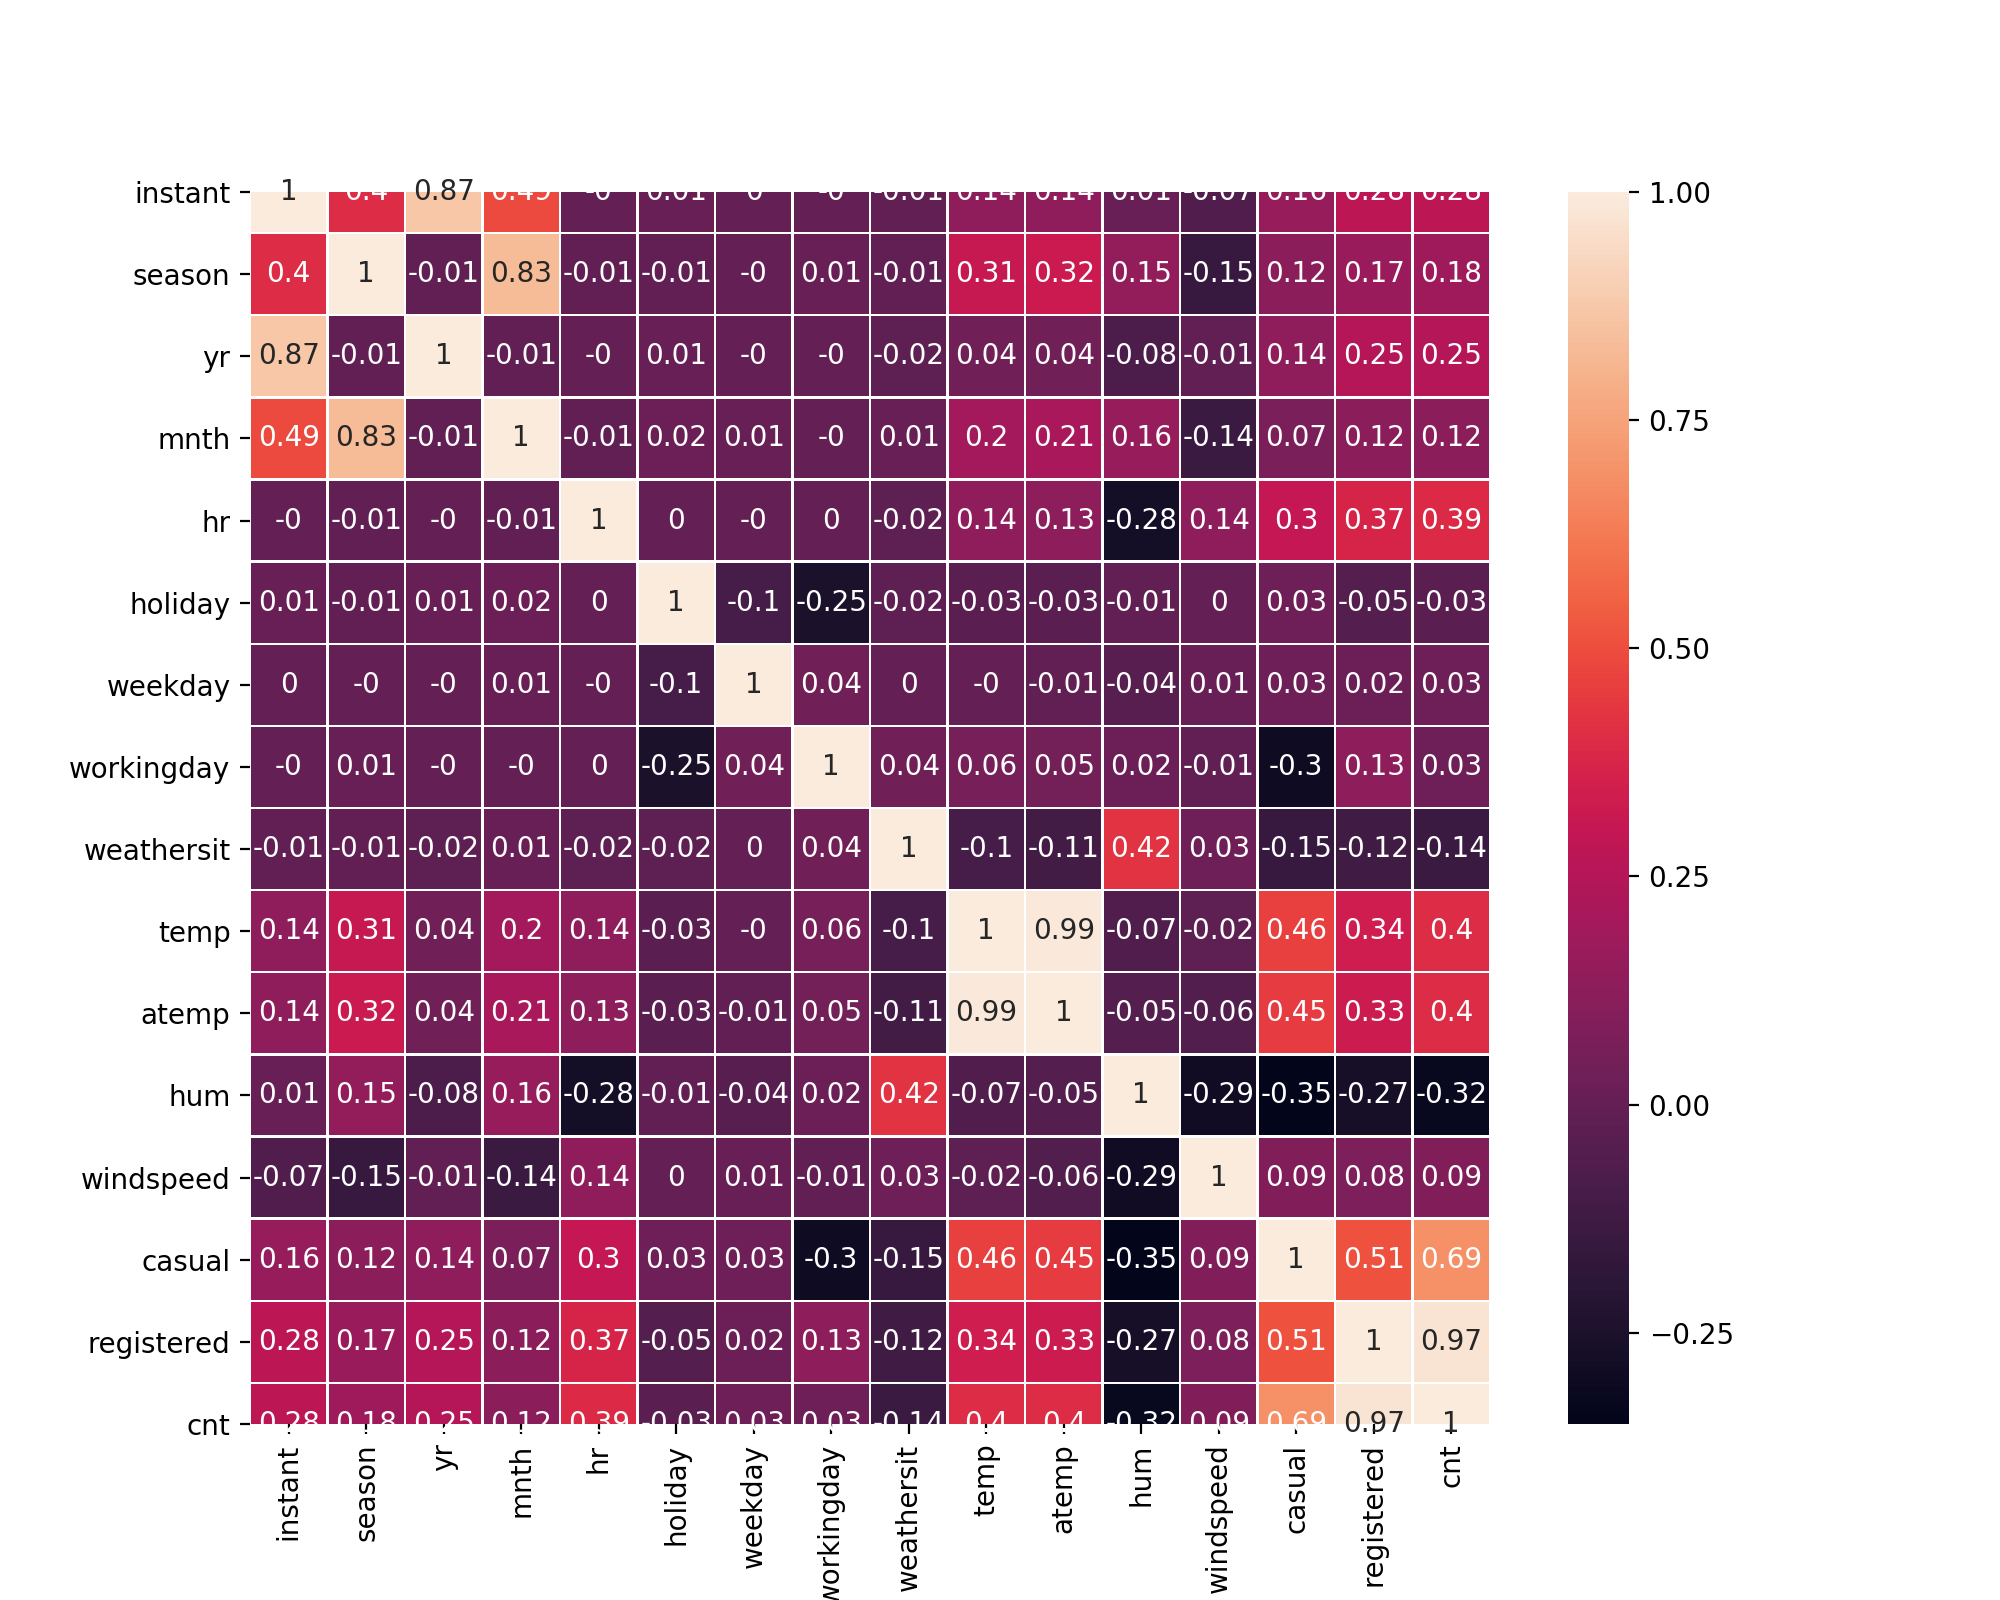

In [10]:
correlacio = dataset.corr().round(2)

plt.figure(figsize=(10,8))

ax = sb.heatmap(correlacio, annot=True, linewidths=.5, )

# ANOTACIONS DESPRES DE VEURE EL HEATMAP:
Com era d'esperar, cada variable te un índex del 100% de correlació amb si mateixa. Però això no ens interessa, sinò el fet de si dues variables estàn molt relacionades entre si o no. 

Les variables que més relació tenen entre elles són principalment registered i cnt, doncs això és perquè la majoria de bicis compartides es fan amb usuaris registrats i pràcticament una equival a l'altre. Un altre variable que té un comportament similar amb cnt és casual, tot i que al ser menys usual que un casual comparteixi bici comparat amb un registered, el valor de correlació és menor. Llavors la millor manera de predir el cnt (el nostre objectiu) seria utilitzant l'atribut registered, però com la informació que ens dona és pràcticament la mateixa que la informació a predir, no ens és útil.

També trobem que les variables yr i instant tenen relació. Això es deu a que les instàncies estan ordenades cronològicament i per tant a majors instàncies, majors anys. Realment no és una relació útil perquè instant és un identificador únic de la mostra en qüestió. Tenim altre cop un comportament similar amb month i season, doncs és evident que cada estació està delimitada per 4 mesos en qüestió i la seva correlació ha de ser elevada. Per últim observem que temp i atemp (temperatura i sensació de temperatura) per raons evidents són variables molt relacionades.

Llavors observant això podríem concloure que les variables instant i atemp ens són prescindibles. Podem dir el mateix (per ara tot i que no descartem revertir aquest canvi posteriorment) de les variables casual i registered, doncs considerem que amb cnt ja tenim aquesta informació prou representada. Per ara no prescindirem de month o season, doncs ens podría ser útil estudiar el model amb ambdós atributs.
    

In [11]:
#Executar aquest codi quan s'hagi d'executar tot, sino ens donarà error al eliminar una columna ja eliminada
del dataset["dteday"]
del dataset["instant"]
del dataset["casual"]
del dataset["registered"]
del dataset["atemp"]

<IPython.core.display.Javascript object>


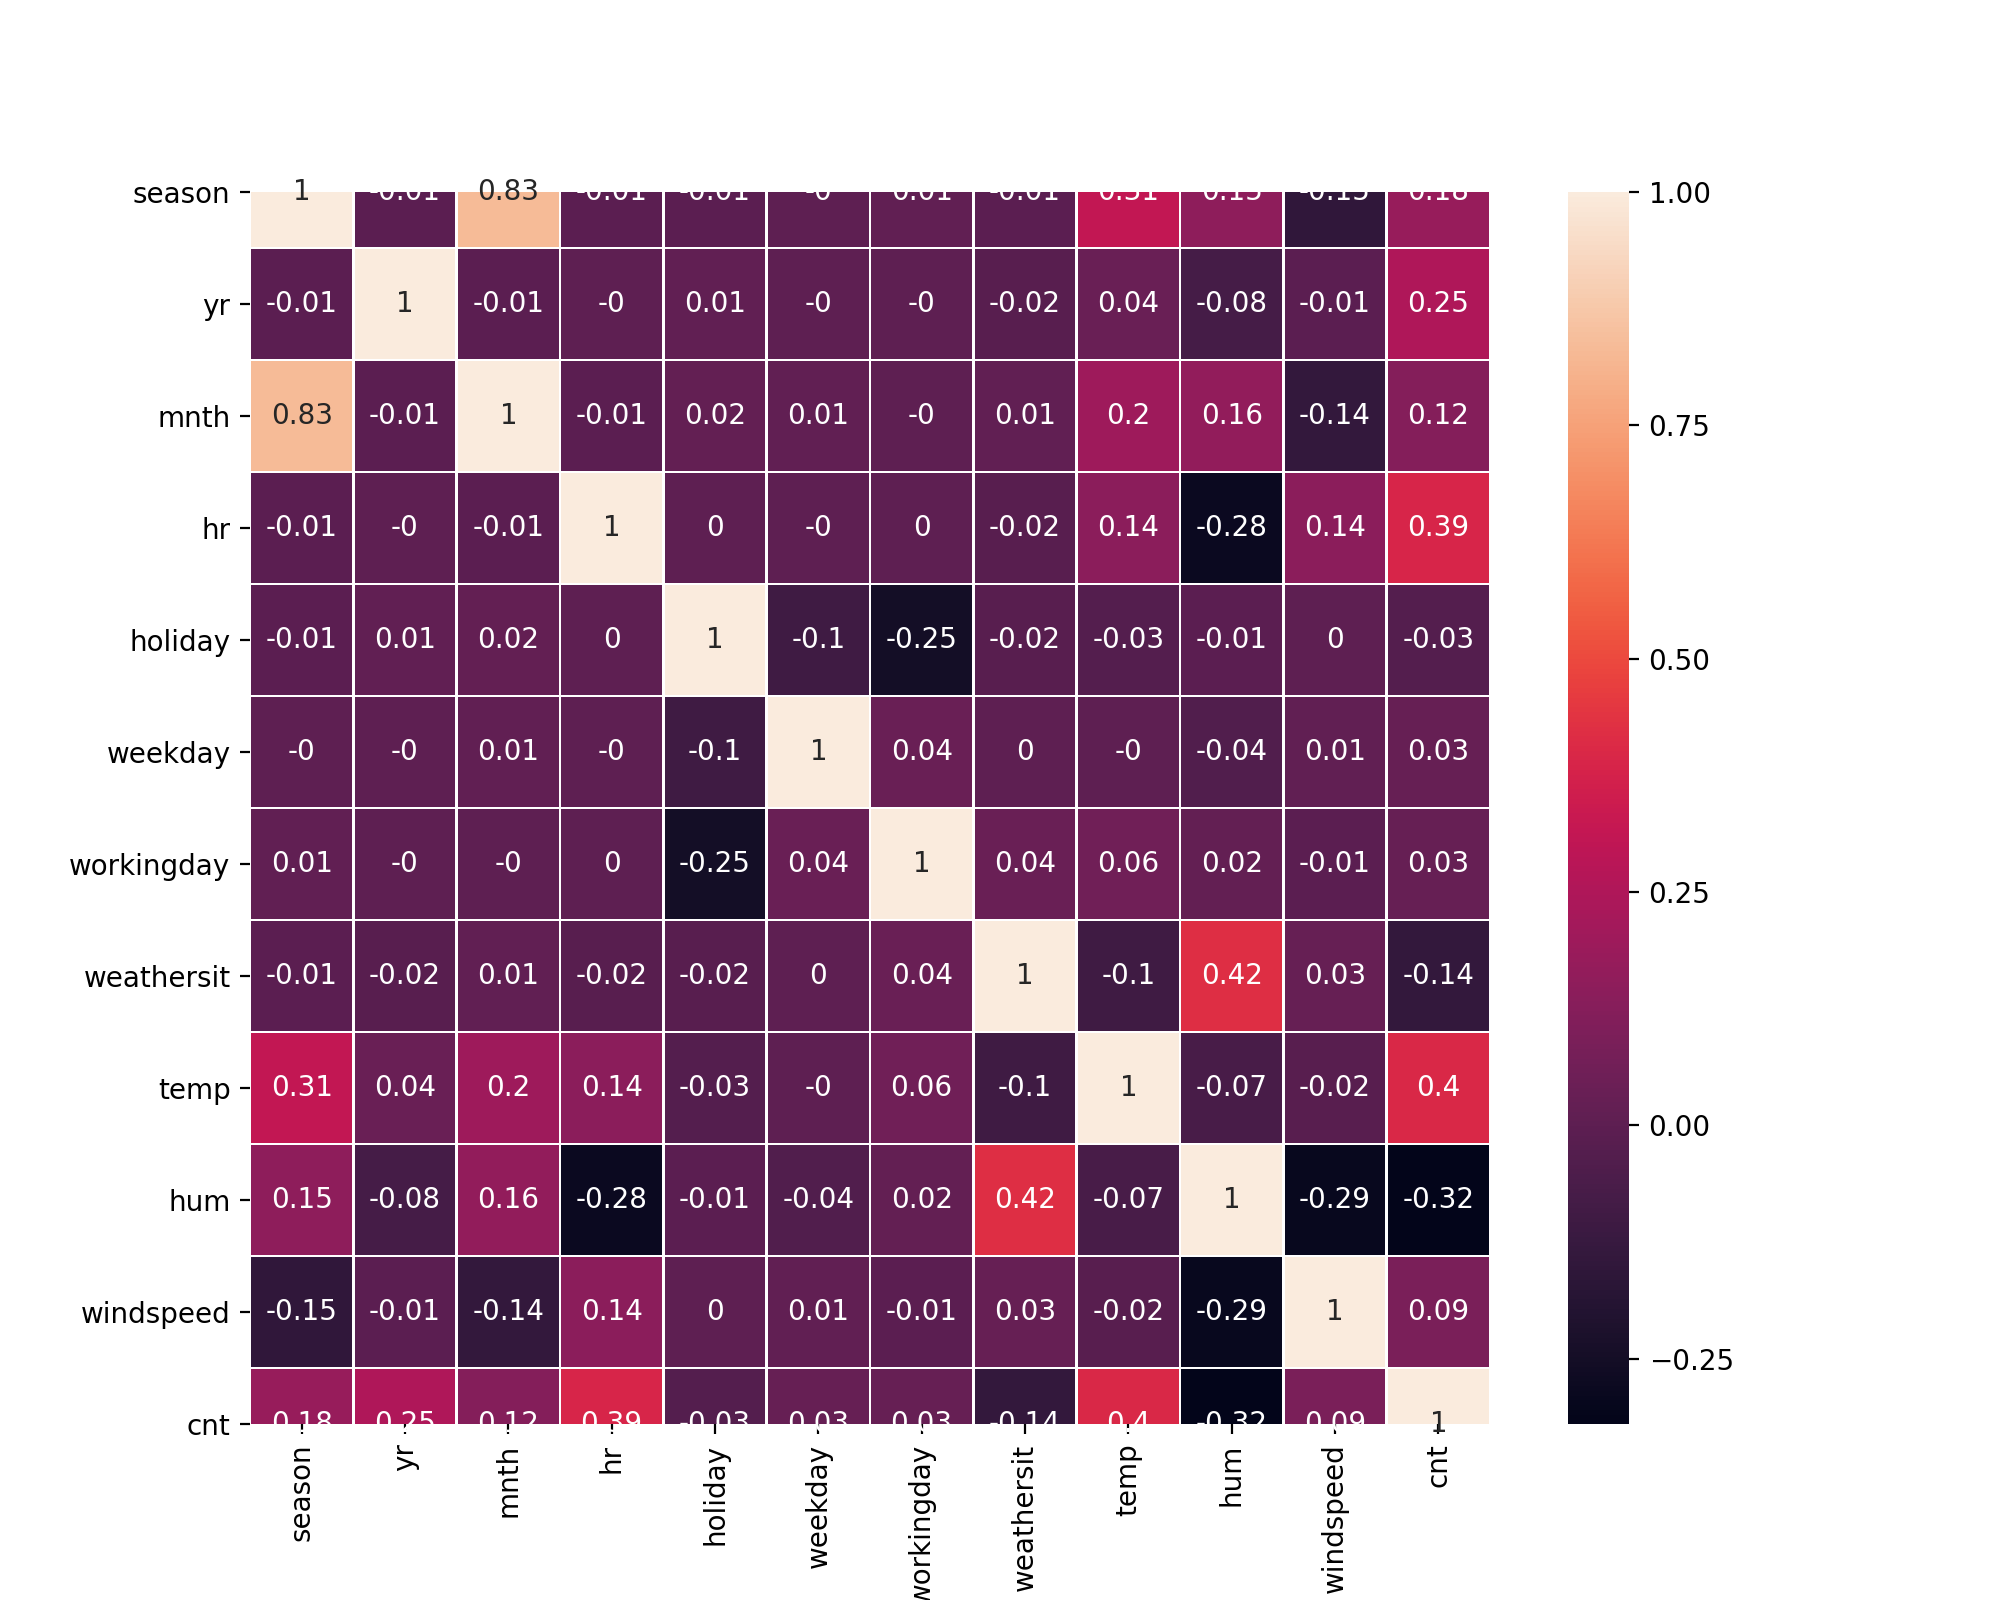

In [12]:
#Repetim el heatmap amb els atributs eliminats
correlacio = dataset.corr().round(2)

plt.figure(figsize=(10,8))

ax = sb.heatmap(correlacio, annot=True, linewidths=.5 )

## ANOTACIONS DESPRÉS DE LA MODIFICACIÓ: HEATMAP
Ara que hem prescindit del atributs que hem considerat innecessaris, podem observar quines variables tenen més relació amb l'atribut target cnt.
Els dos atributs principals que tenen un valor de correlació molt similar i considerem més rellevants són:

* temp
* hr

Seguit d'un valor menor però significant:
* yr: Probablement el fet de compartir bici ha estat més popular el segon any que no pas el primer.

Noves relacions que se'ns havien escapat en el comentari previ serien les següents:
* temp - season: Evidentment a l'estiu la temperatura serà més elevada que no pas a l'hivern
* hum - weathersit: Tot i que no sempre es el cas, normalment un dia assolejat la humitat no és tan elevada com ho és un dia que neva o plou.


In [13]:
data = dataset.values

print(data.shape)

x = data[:, 0:11]
y = data[:, 11]


#x = np.array(x, dtype=np.float64)
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(x)

(17379, 12)


<IPython.core.display.Javascript object>


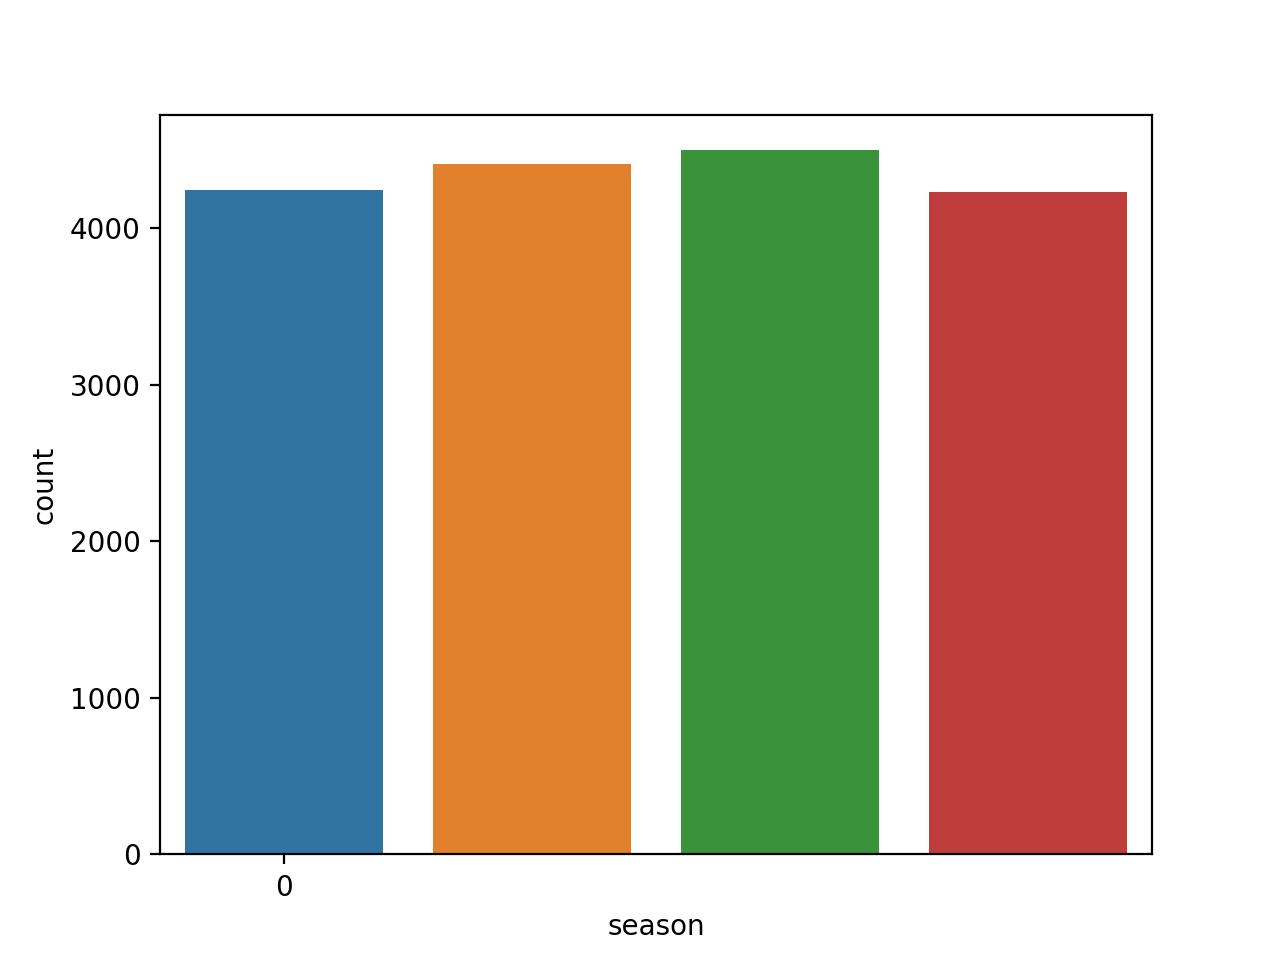

<IPython.core.display.Javascript object>


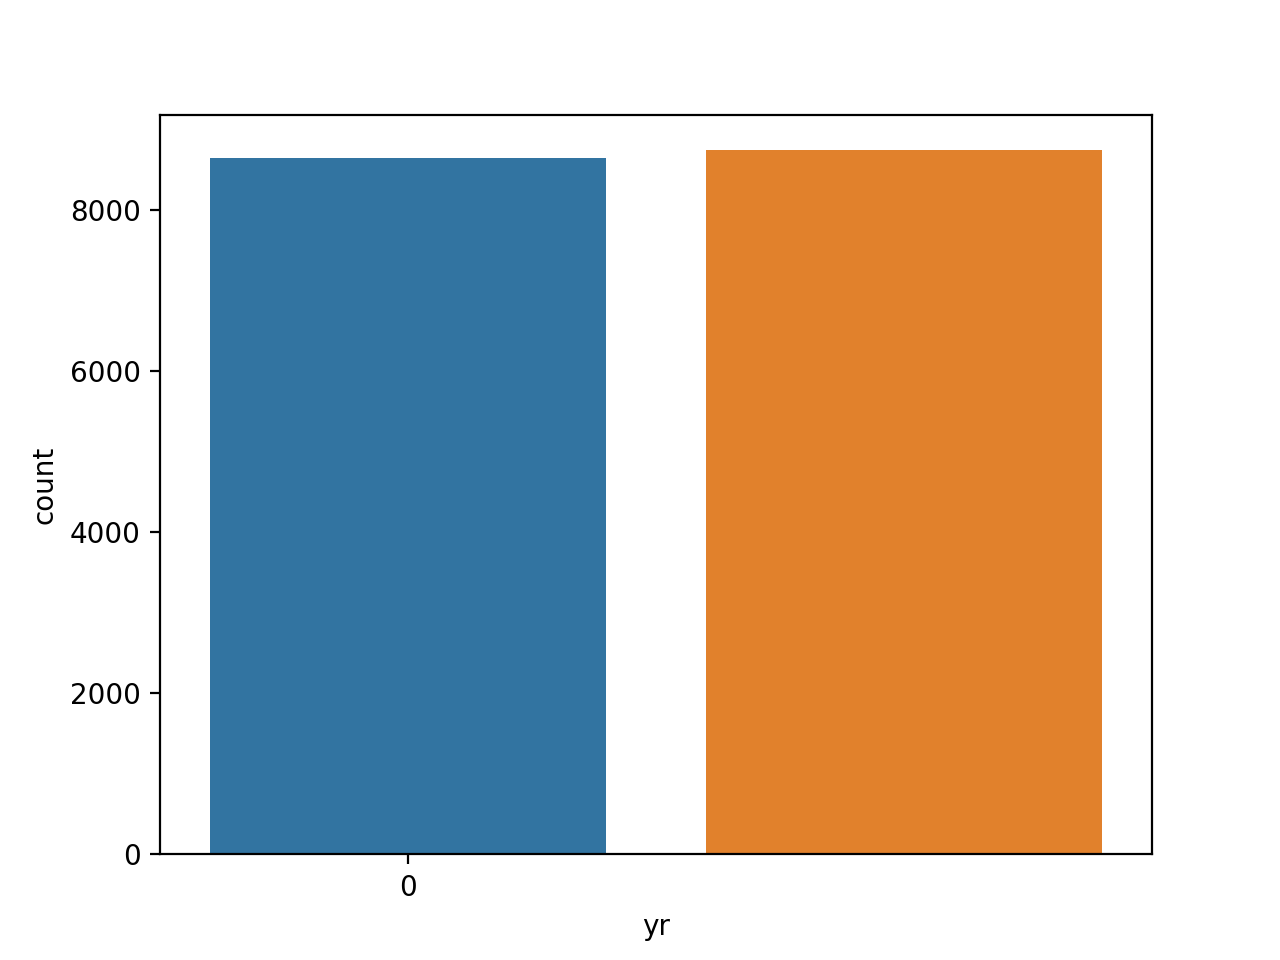

<IPython.core.display.Javascript object>


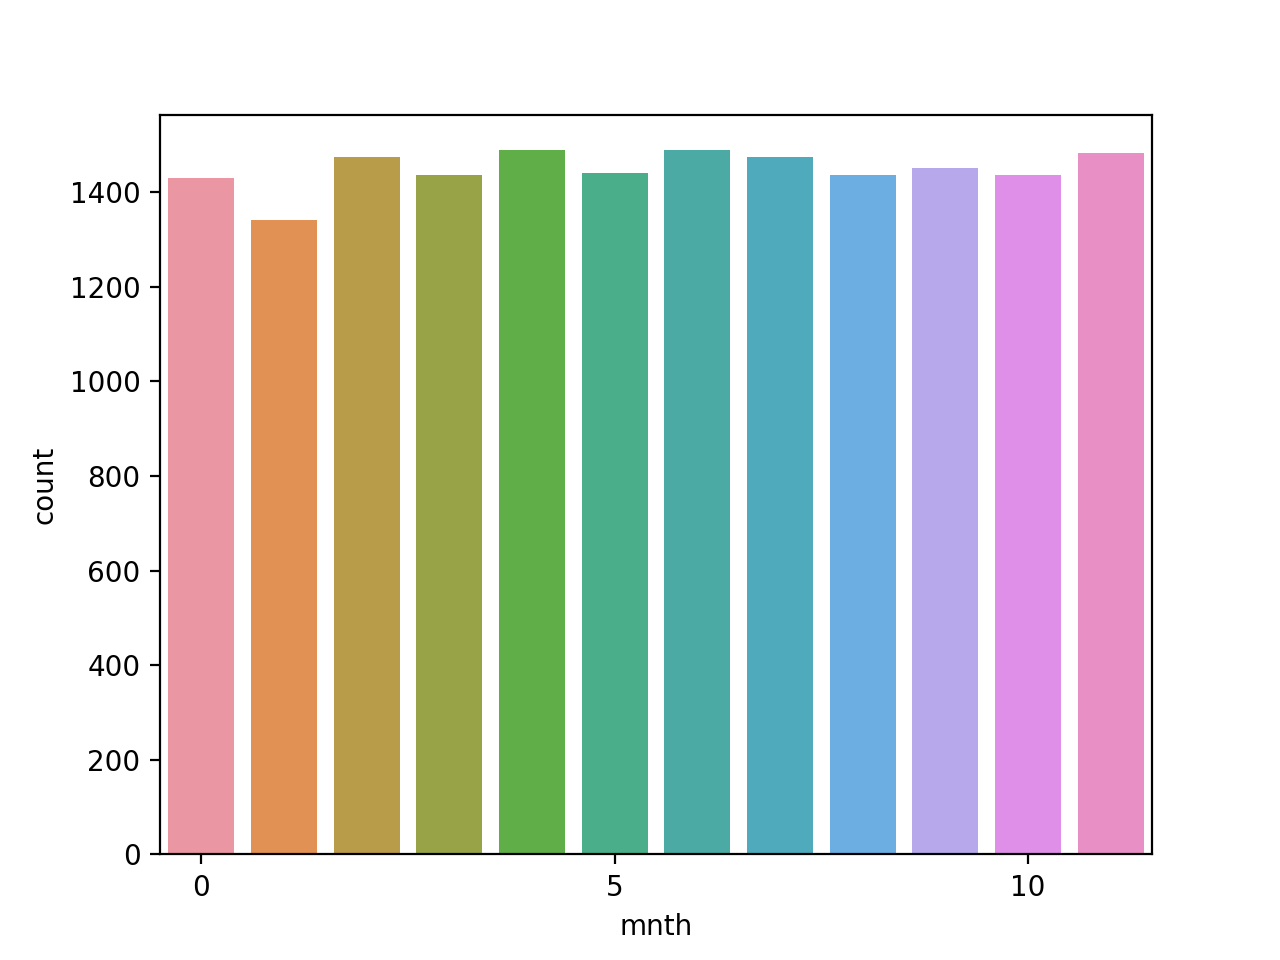

<IPython.core.display.Javascript object>


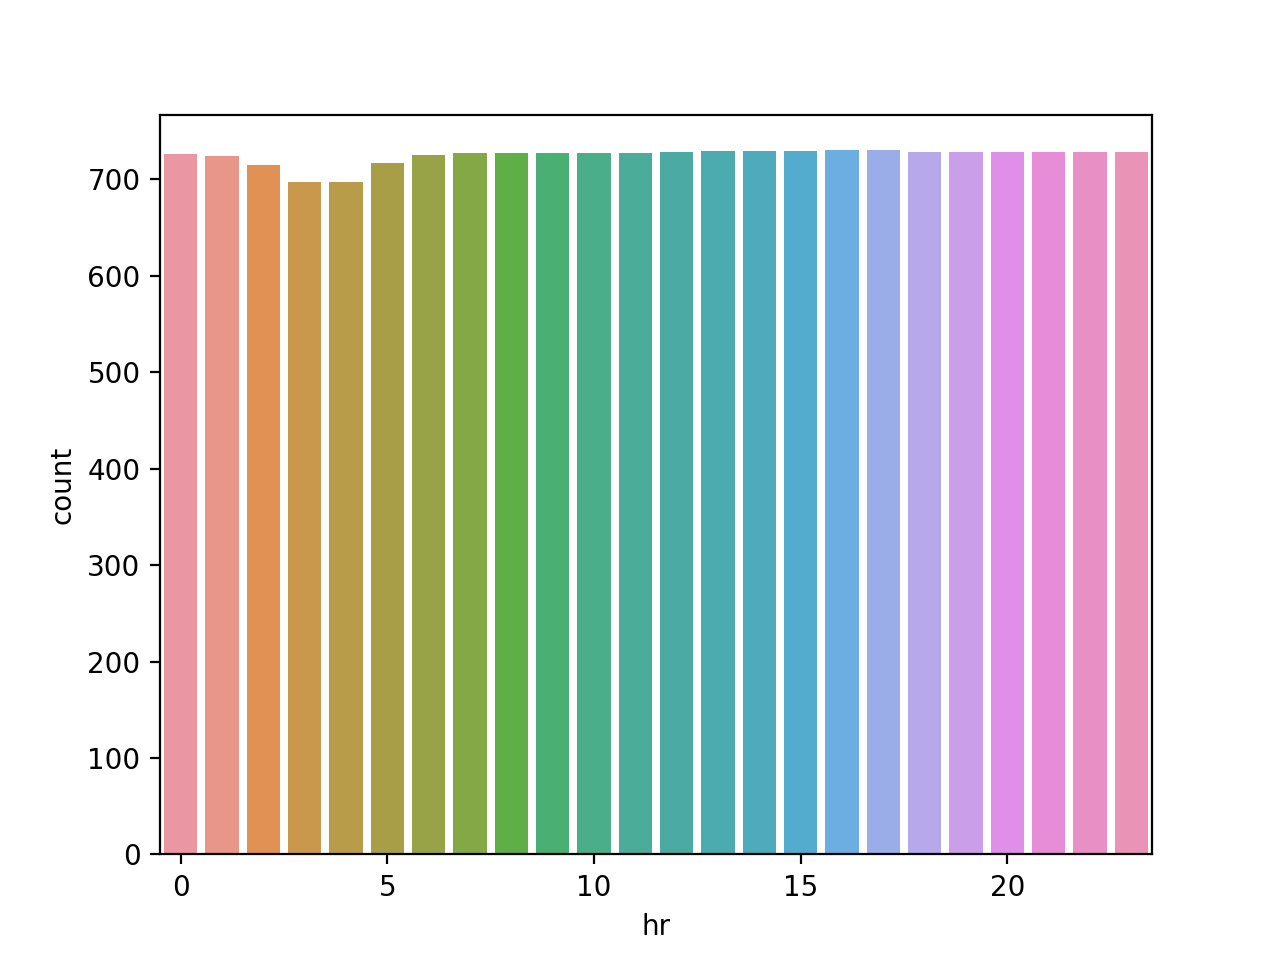

<IPython.core.display.Javascript object>


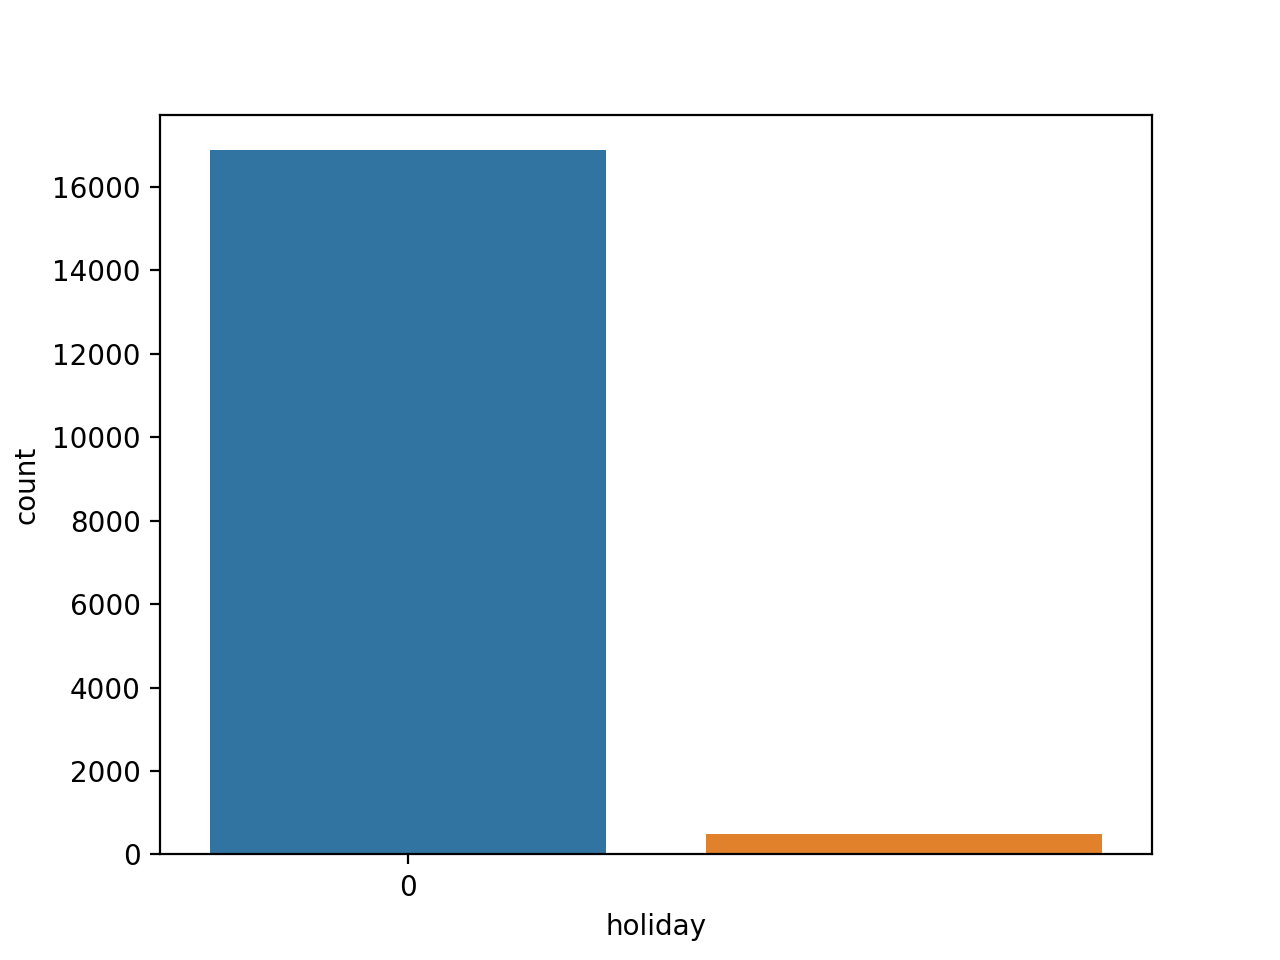

<IPython.core.display.Javascript object>


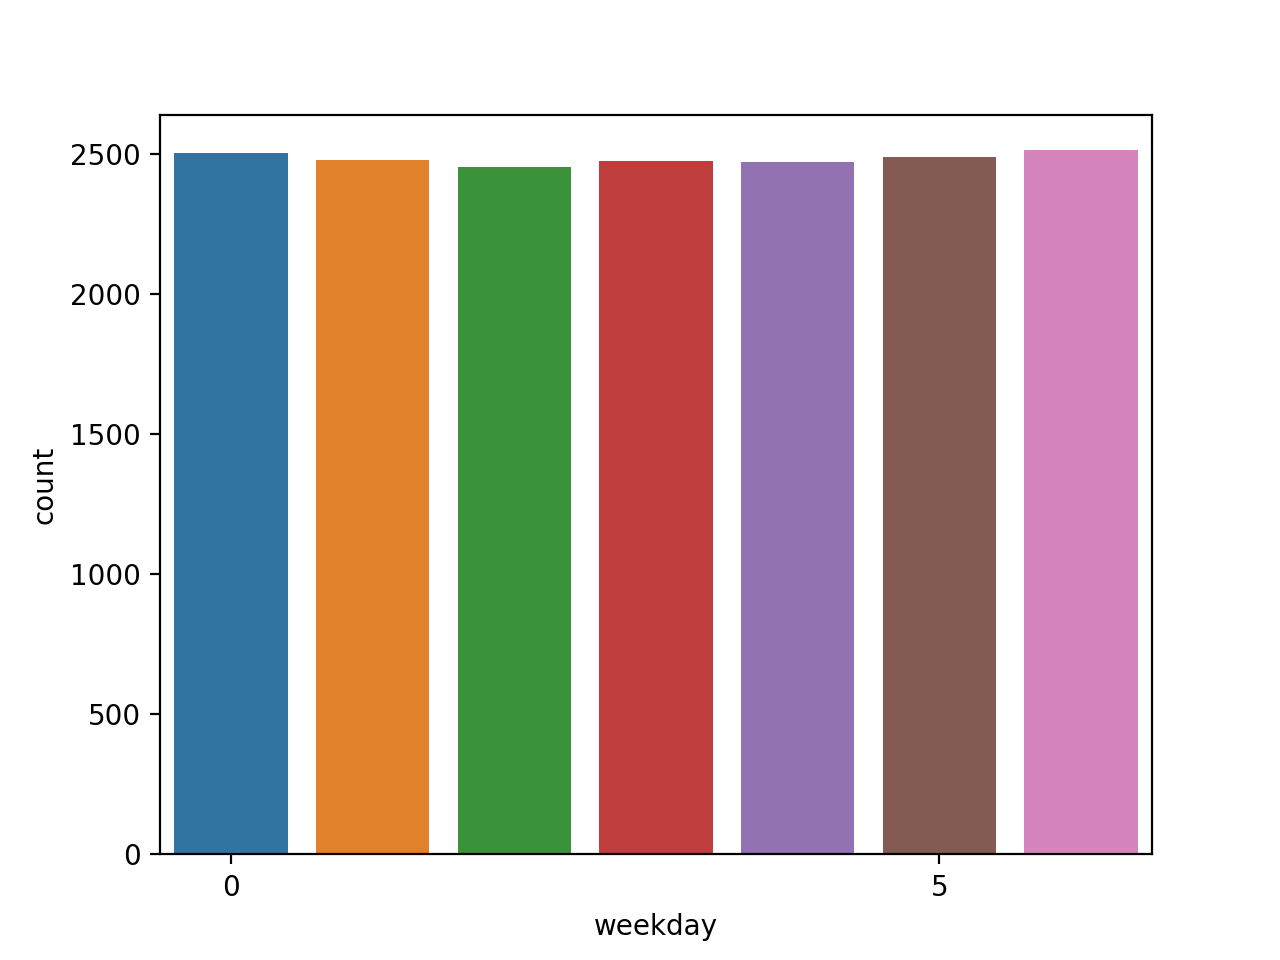

<IPython.core.display.Javascript object>


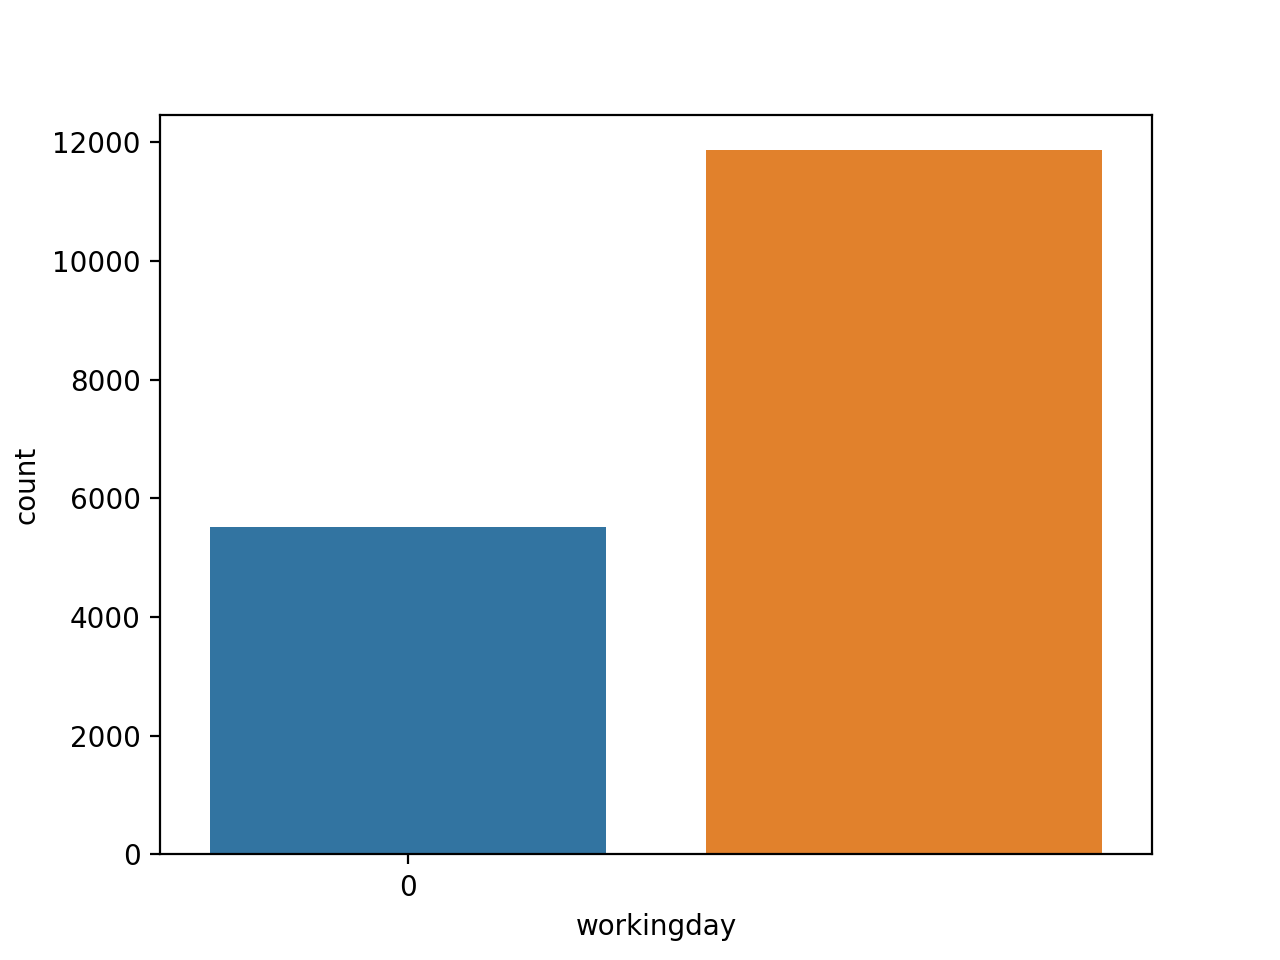

<IPython.core.display.Javascript object>


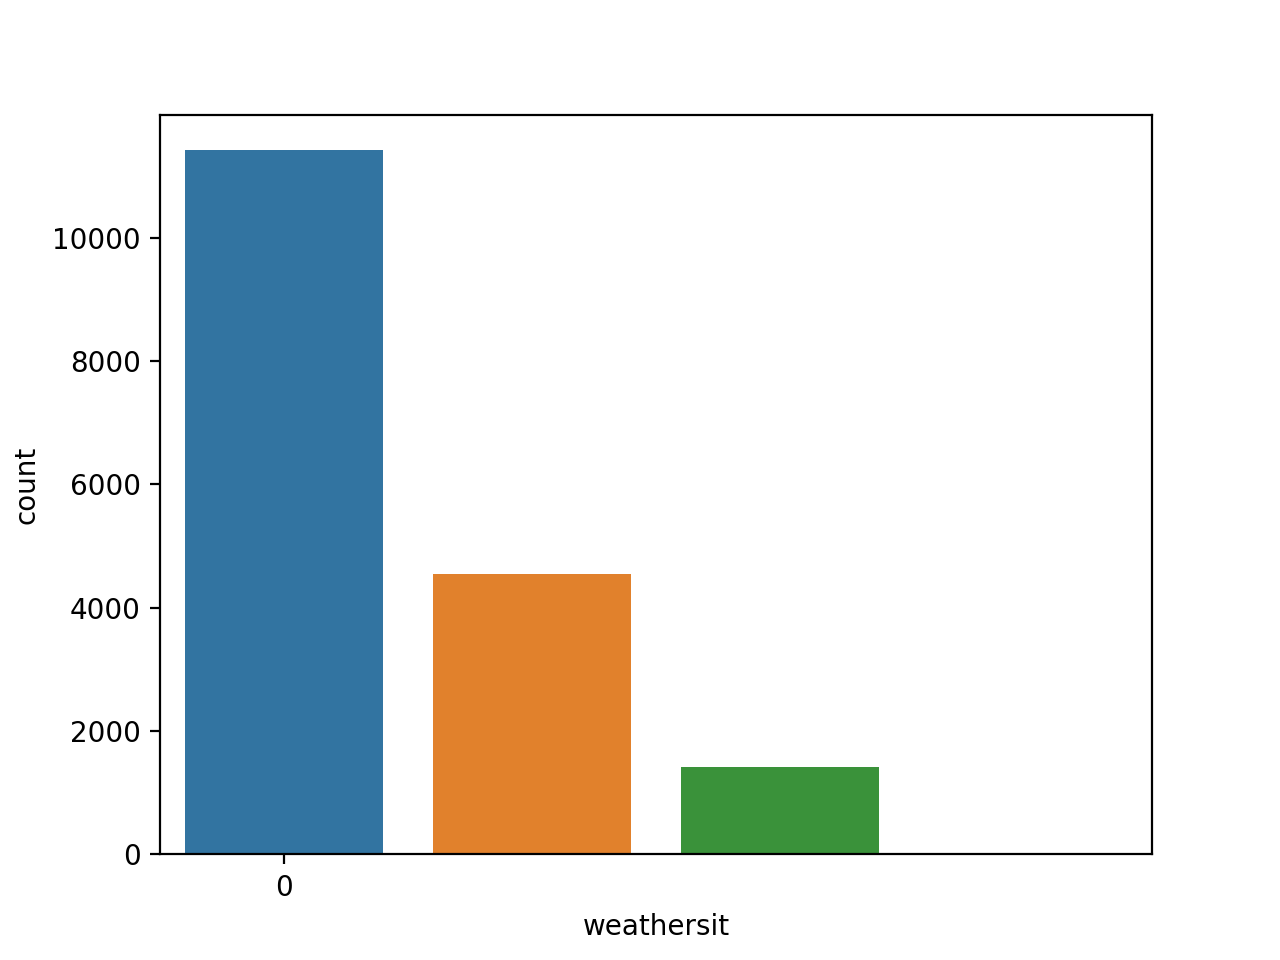

<IPython.core.display.Javascript object>


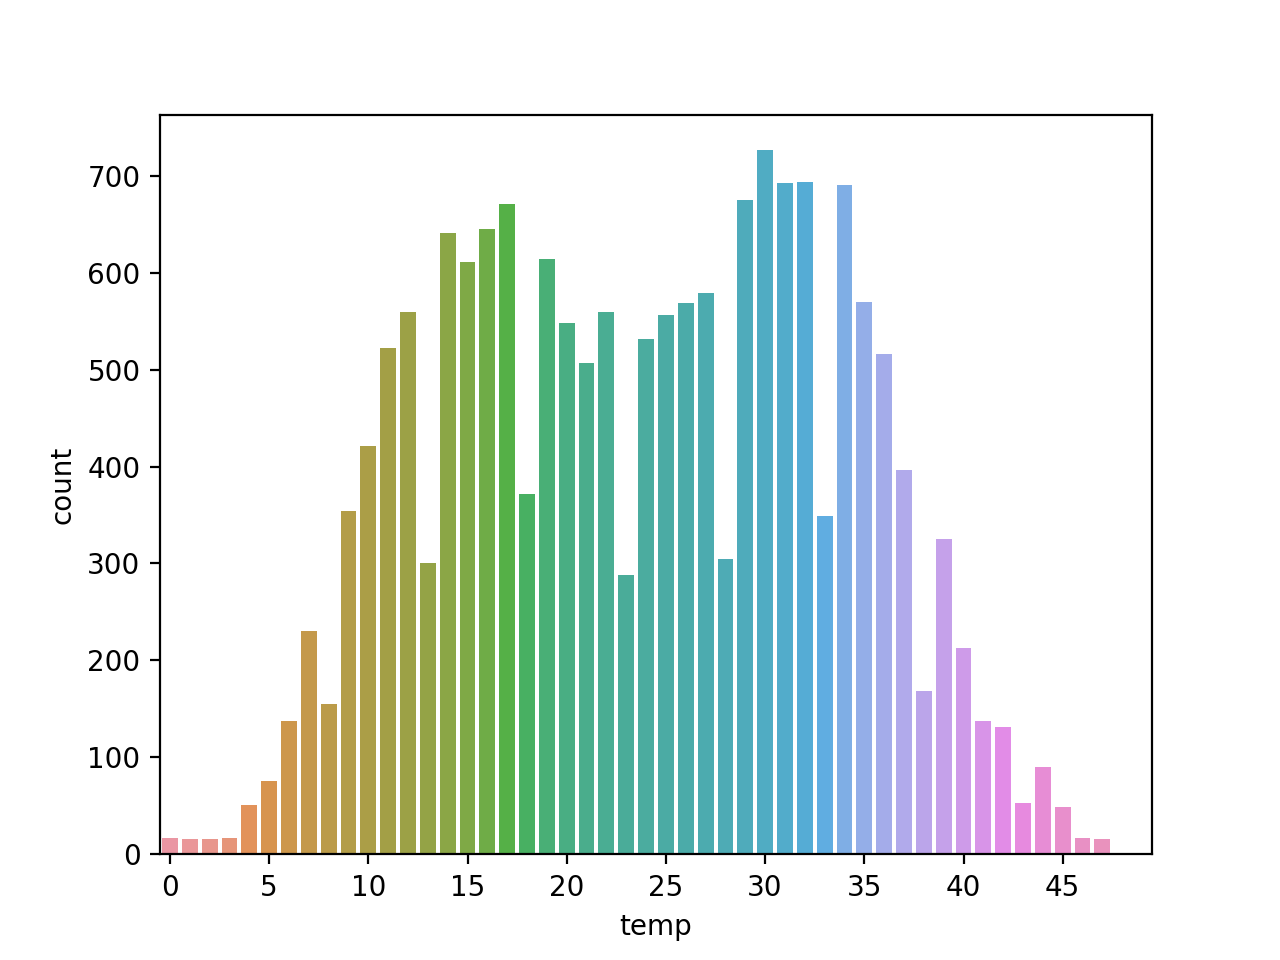

<IPython.core.display.Javascript object>


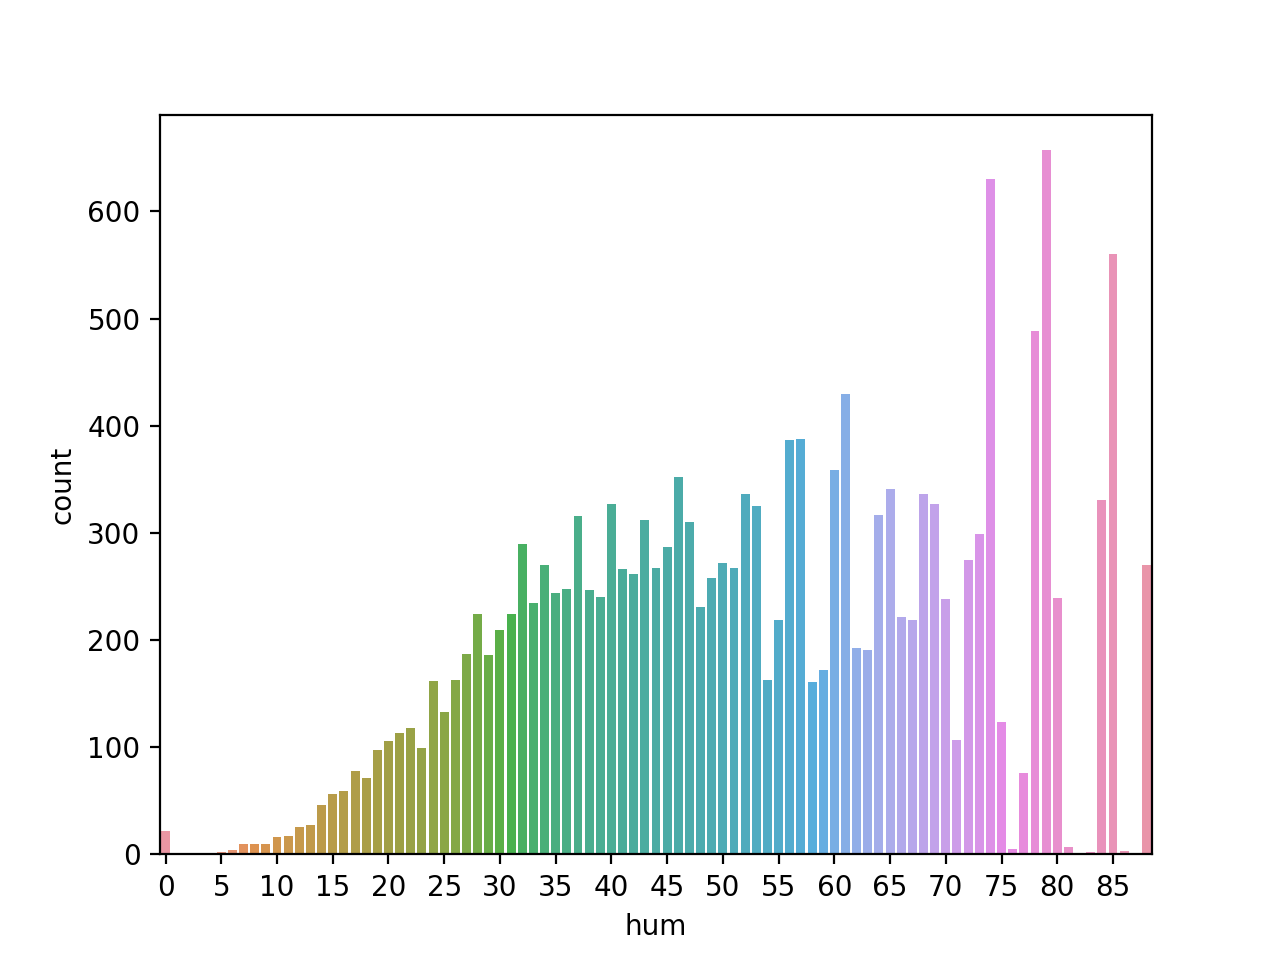

<IPython.core.display.Javascript object>


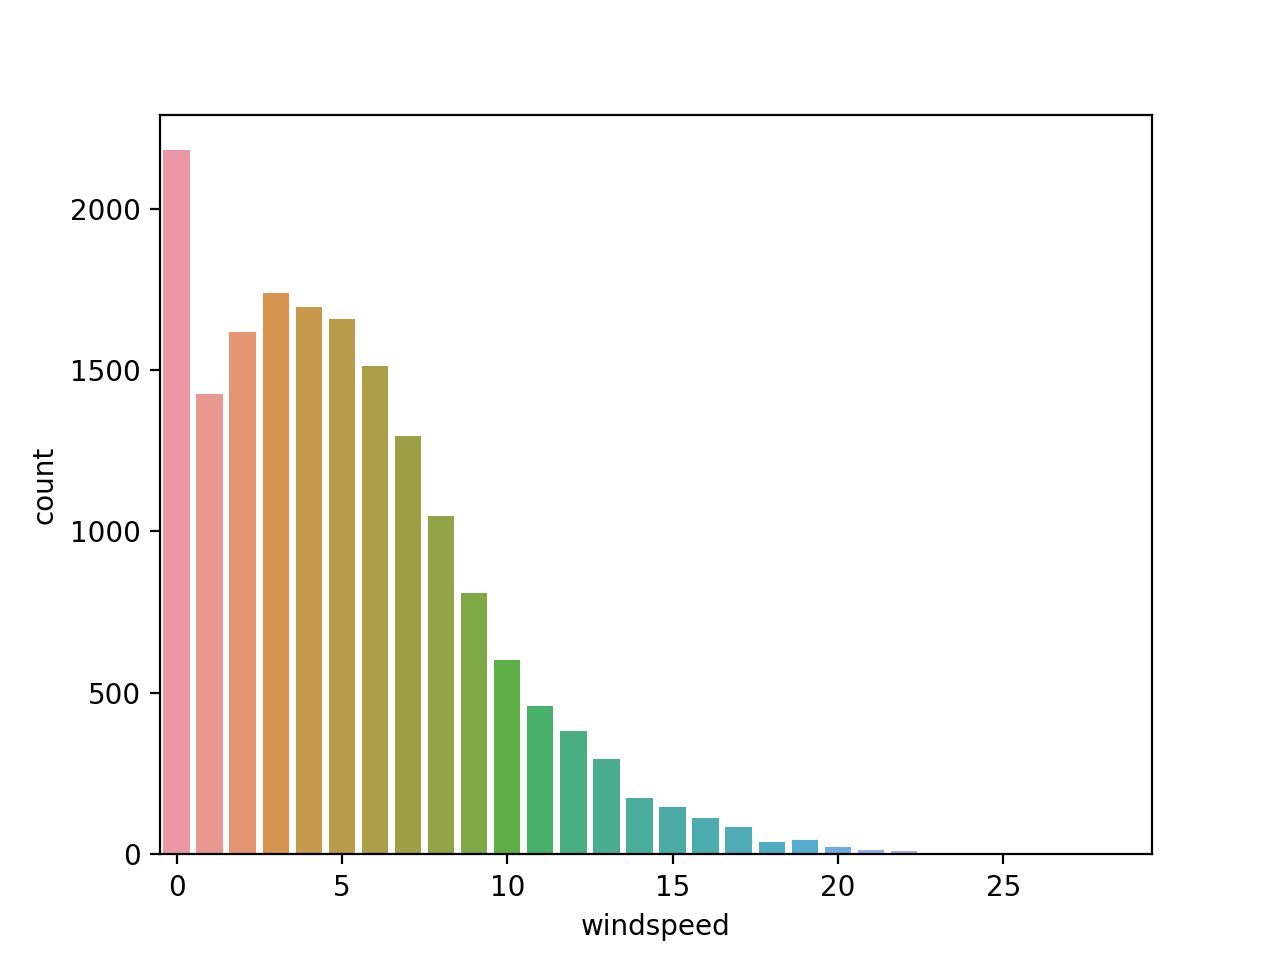

<IPython.core.display.Javascript object>


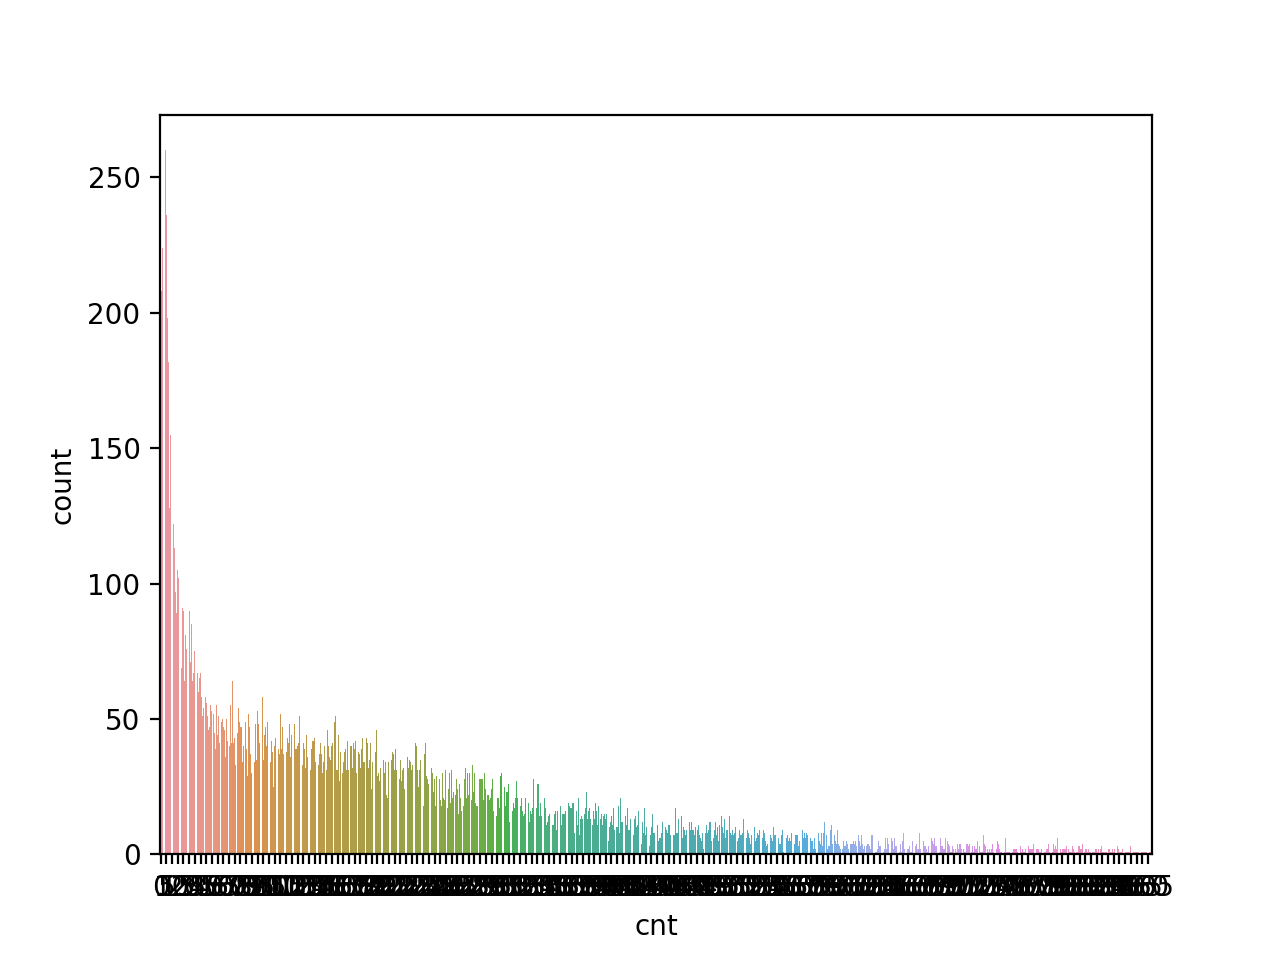

In [14]:
import matplotlib.ticker as ticker
for col in dataset.columns:
    plt.figure()
    ax = sb.countplot(x=col, data=dataset)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))
    plt.show()


## Anàlisis del comportament dels atributs
Com podem observar, els atributs amb una distribució semblant a la normal són:
* temp
* hum
* windspeed


Creem la funció standarize, que mitjançant procediments de normalització, modifica tots els atributs del dataset, per identificar els valors que tinguin distribució normal, millors per fer regressió, i descartar els que no siguin representatius.
Per visualitzar la millora que suposarà normalitzar les dades, calcularem el mean squared error per a la regressió aplicada directament sobre el dataset i per a la regressió després de normalitzar els atributs.


<IPython.core.display.Javascript object>


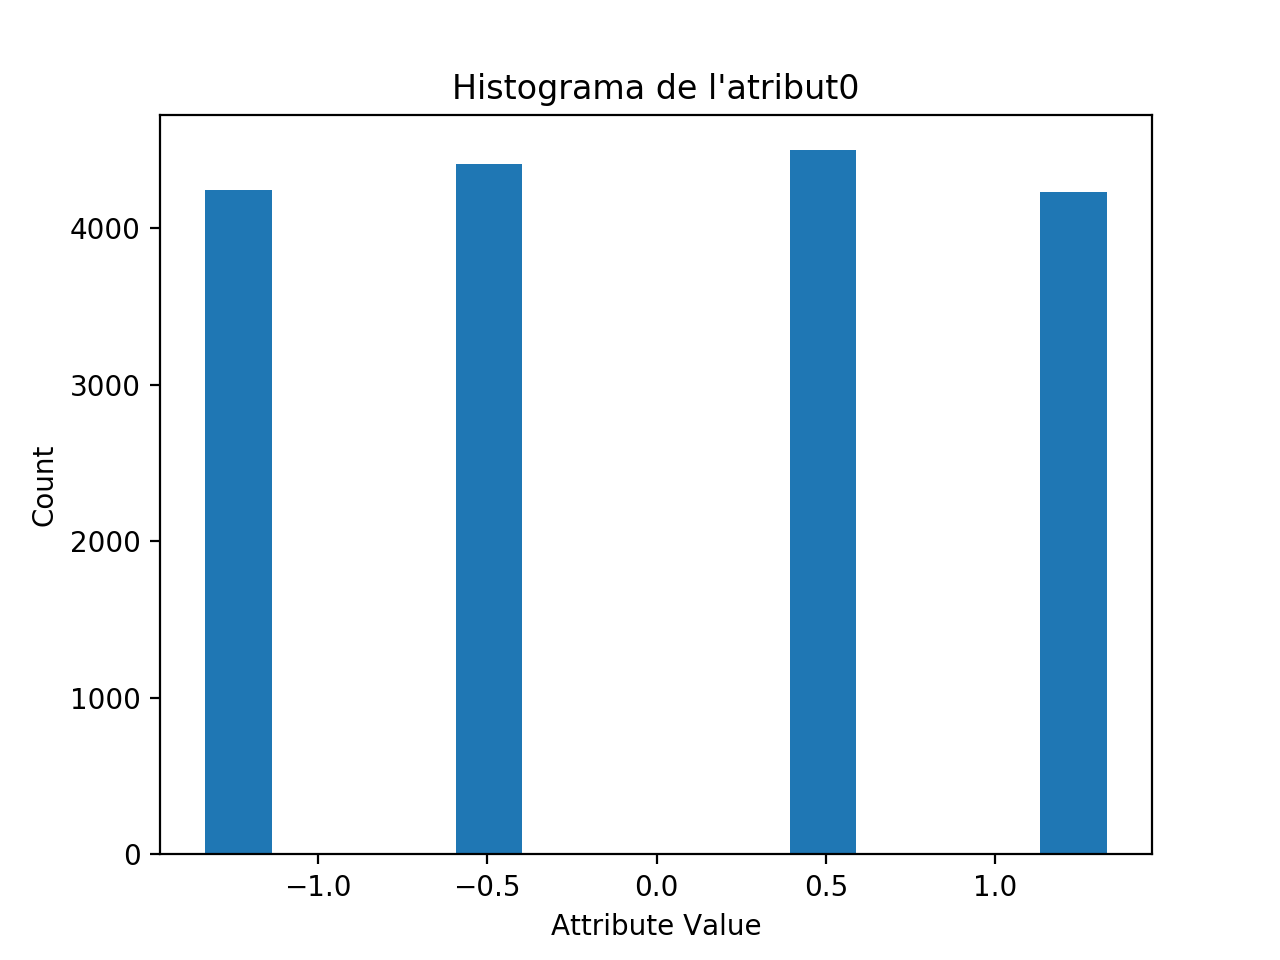

<IPython.core.display.Javascript object>


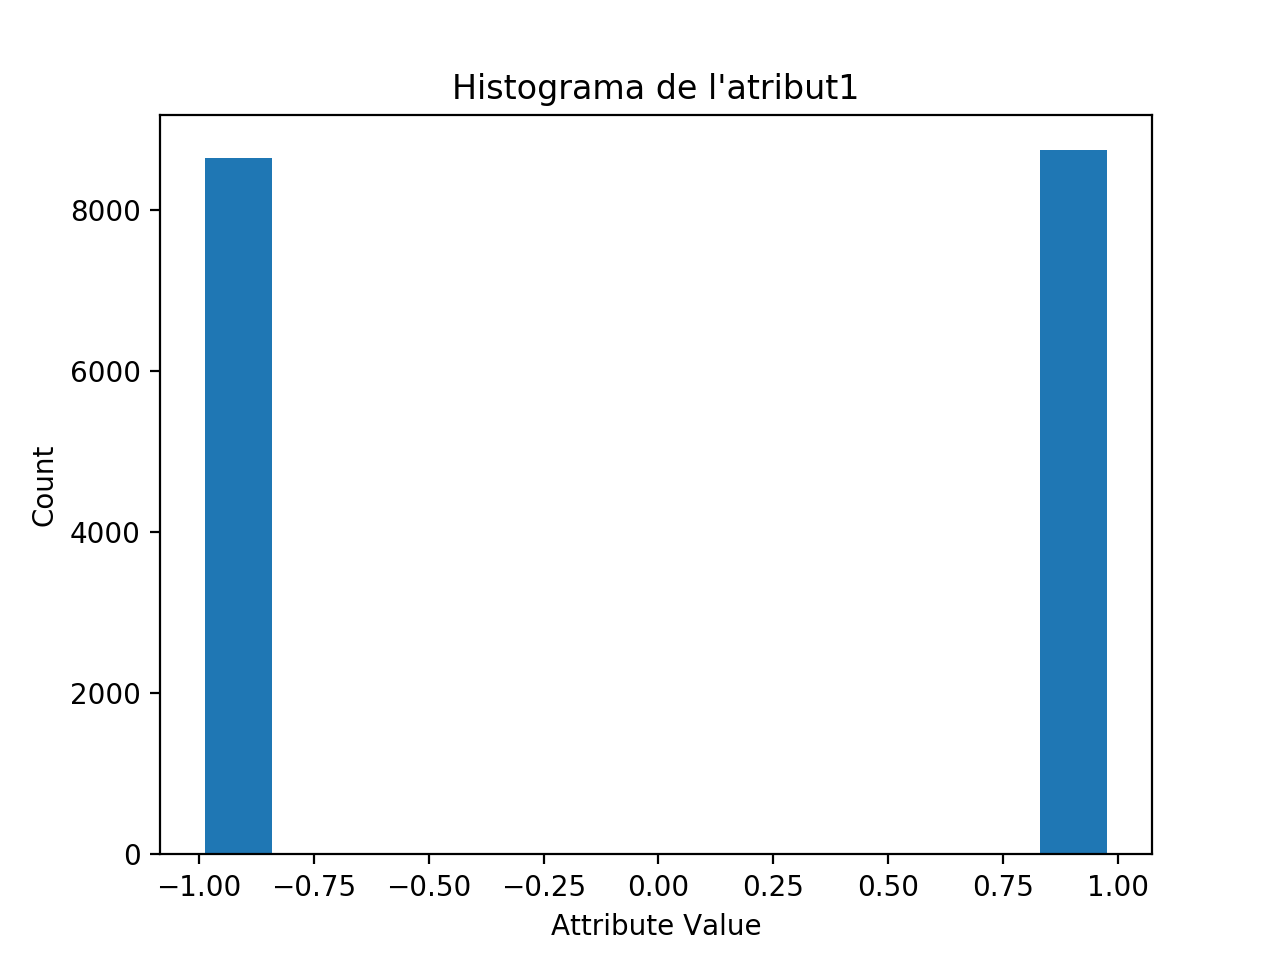

<IPython.core.display.Javascript object>


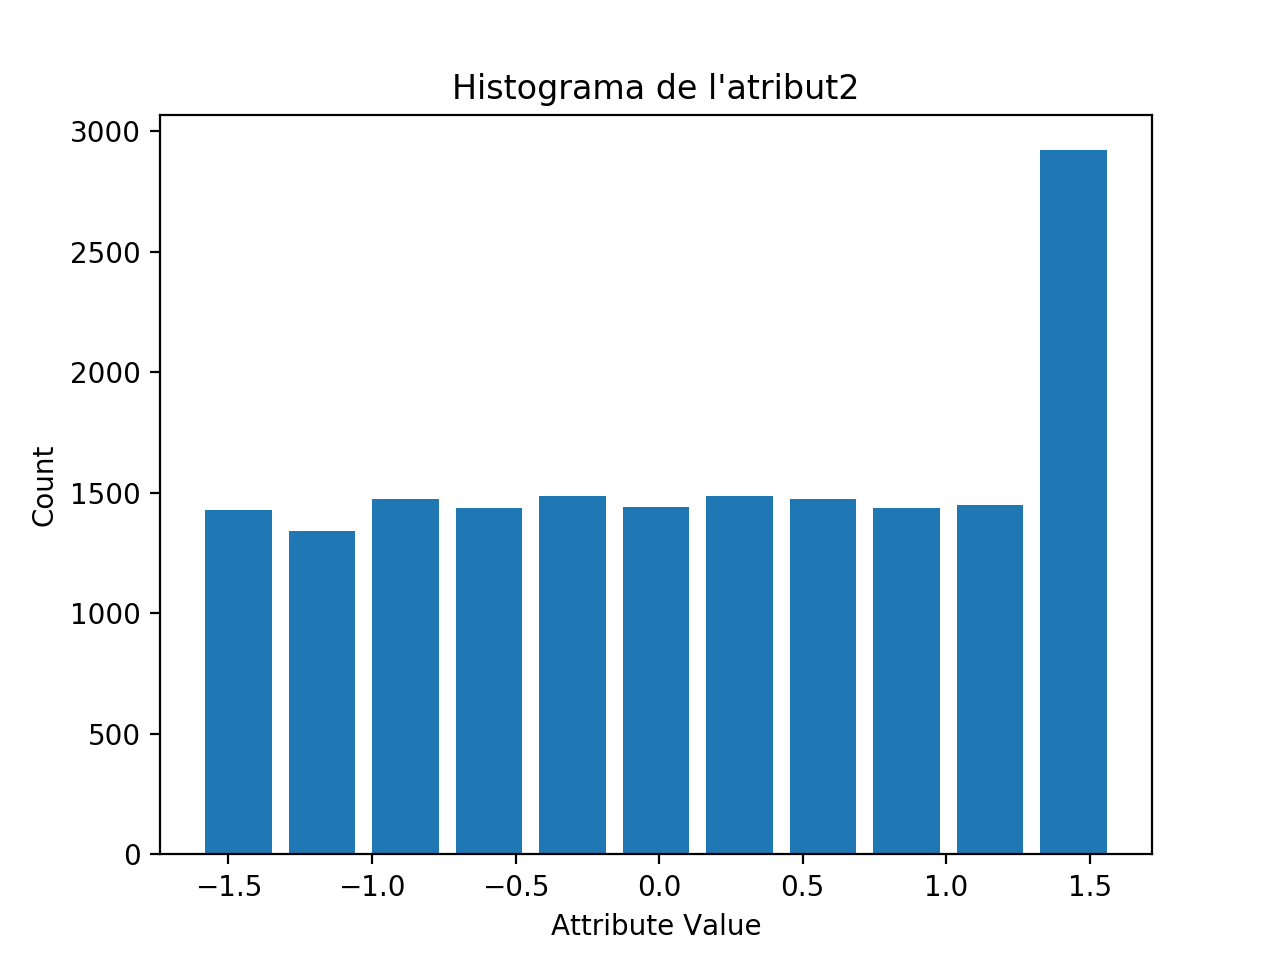

<IPython.core.display.Javascript object>


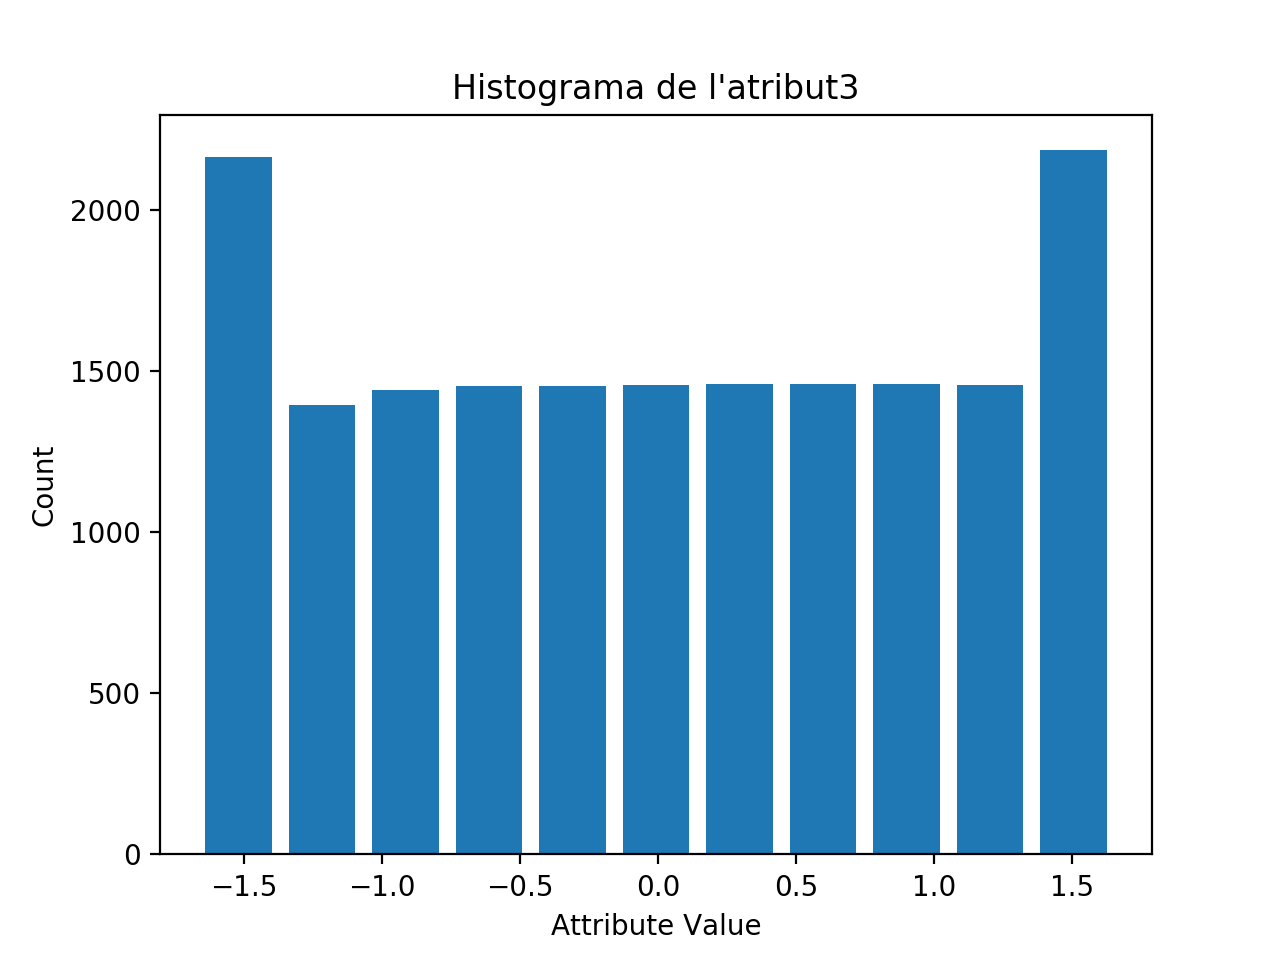

<IPython.core.display.Javascript object>


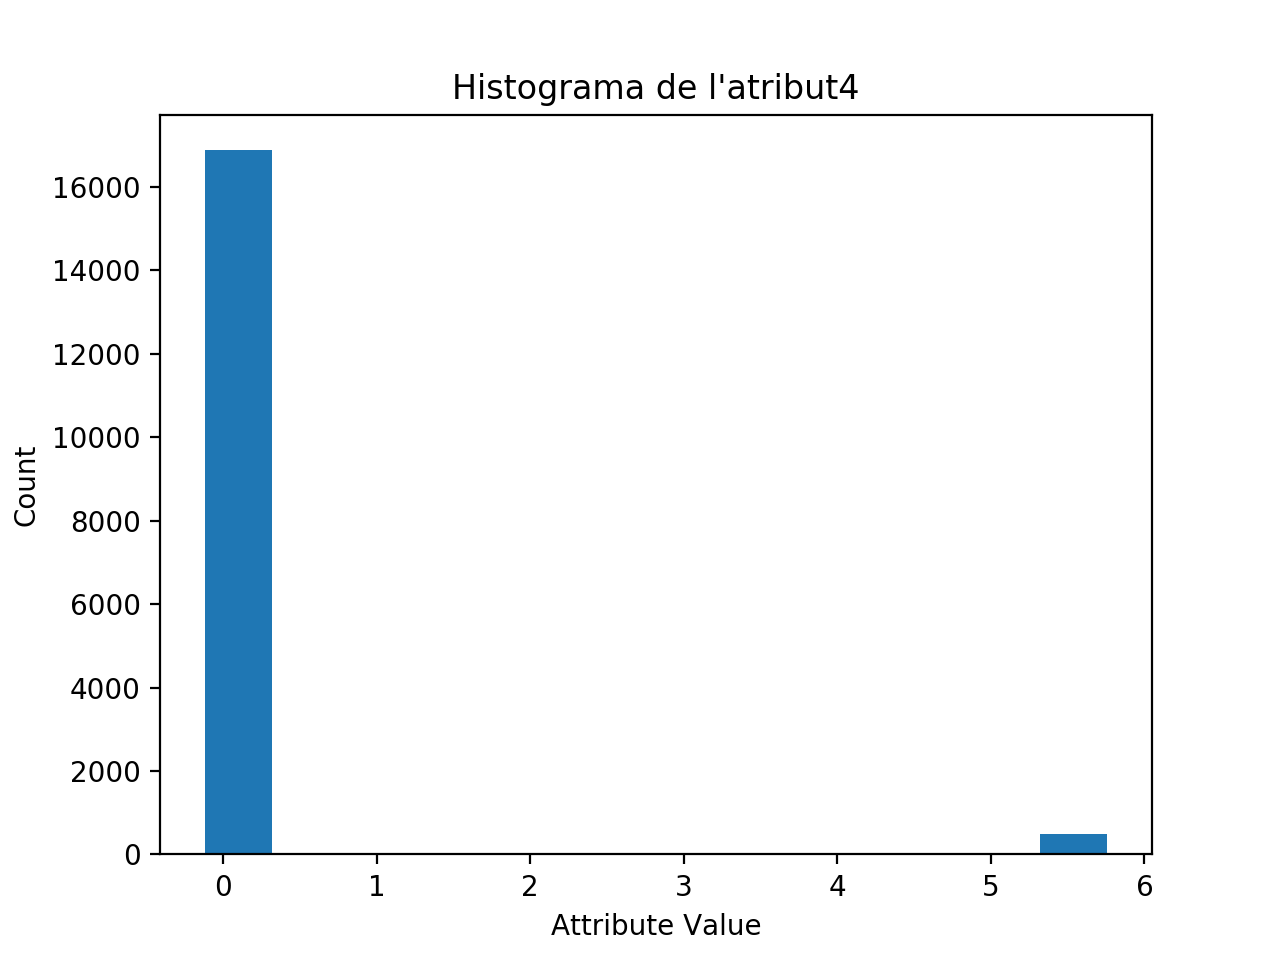

<IPython.core.display.Javascript object>


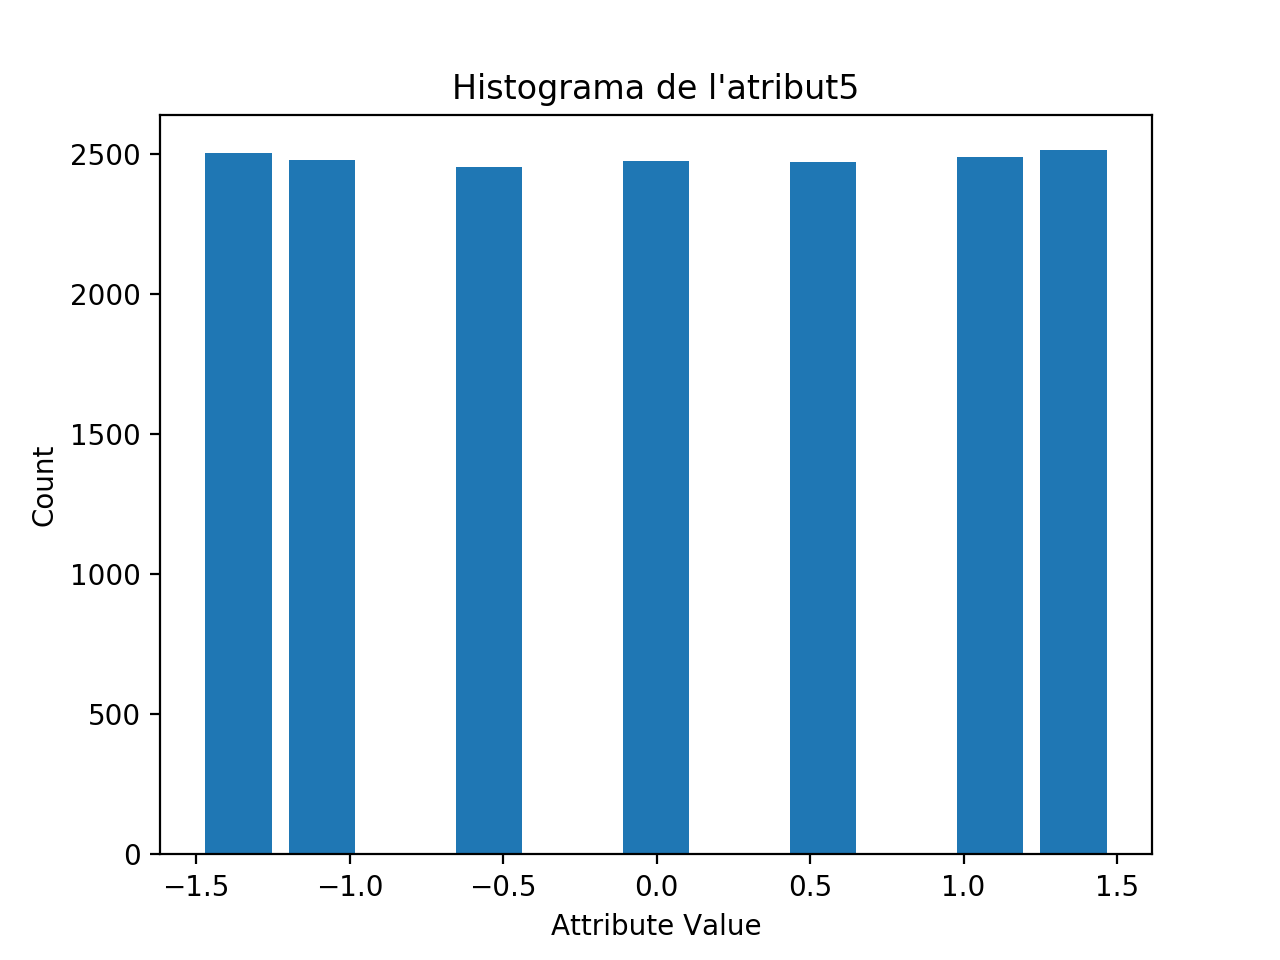

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


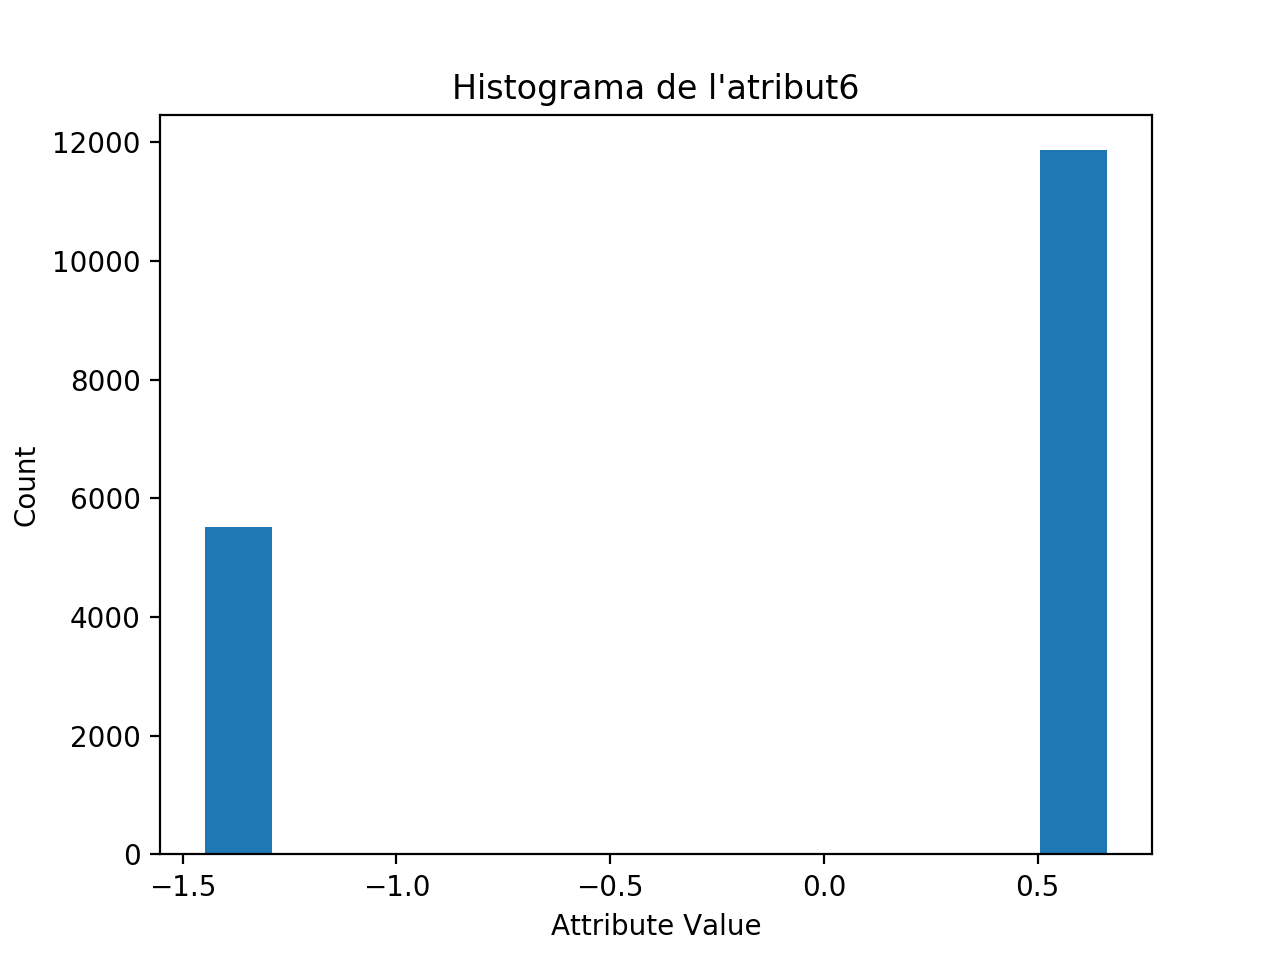

<IPython.core.display.Javascript object>


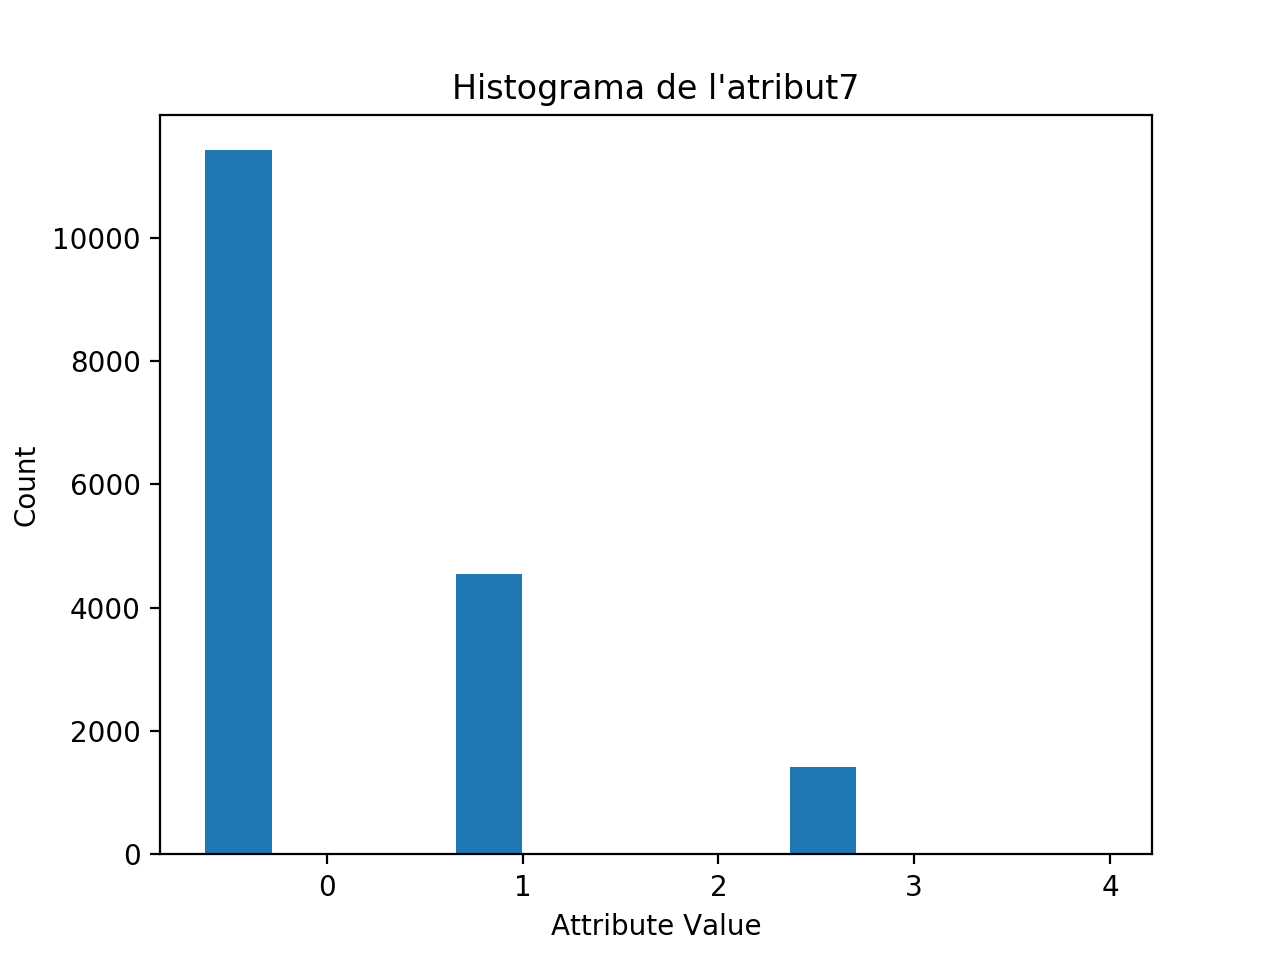

<IPython.core.display.Javascript object>


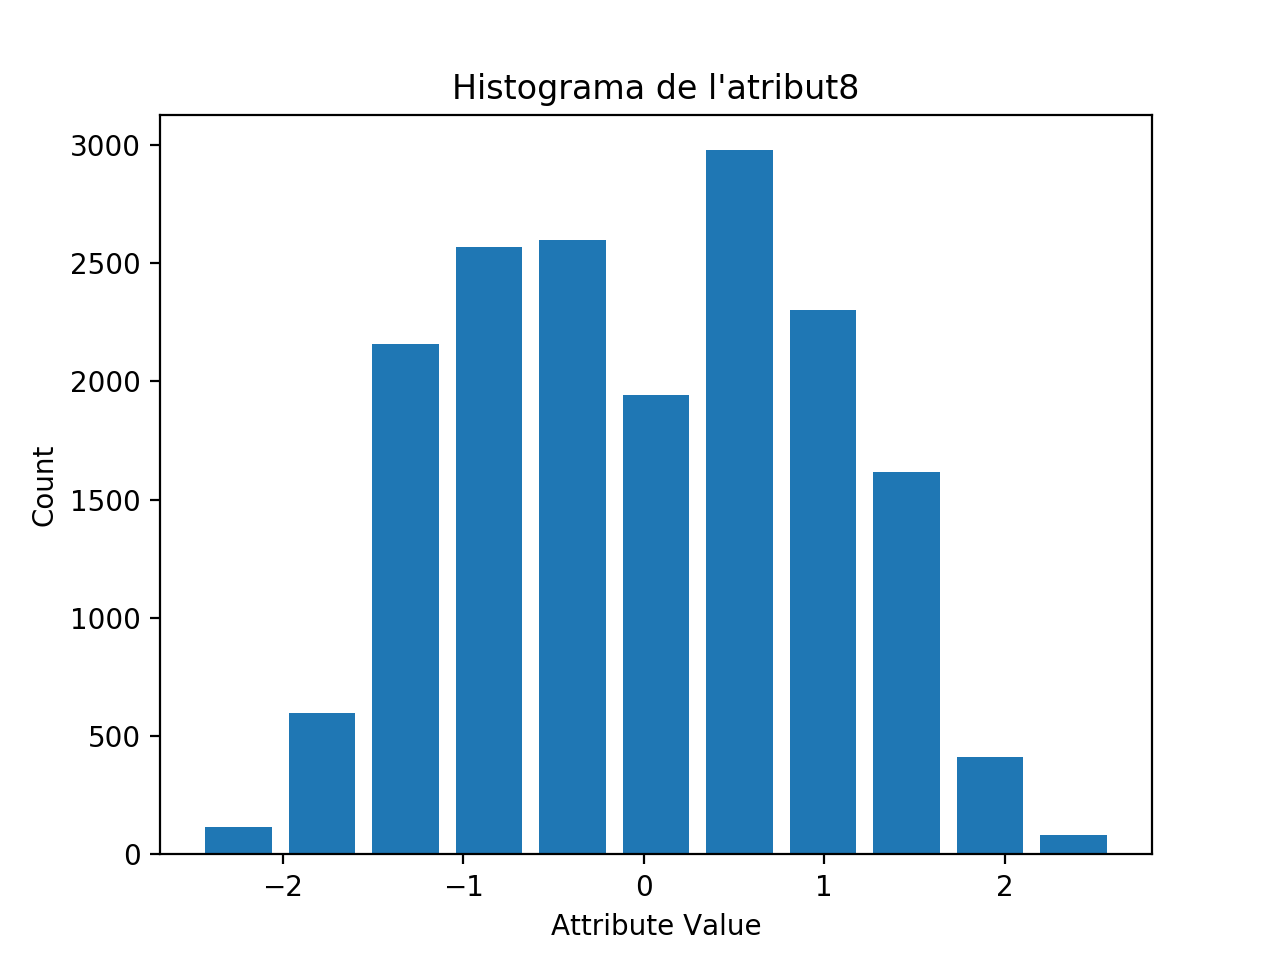

<IPython.core.display.Javascript object>


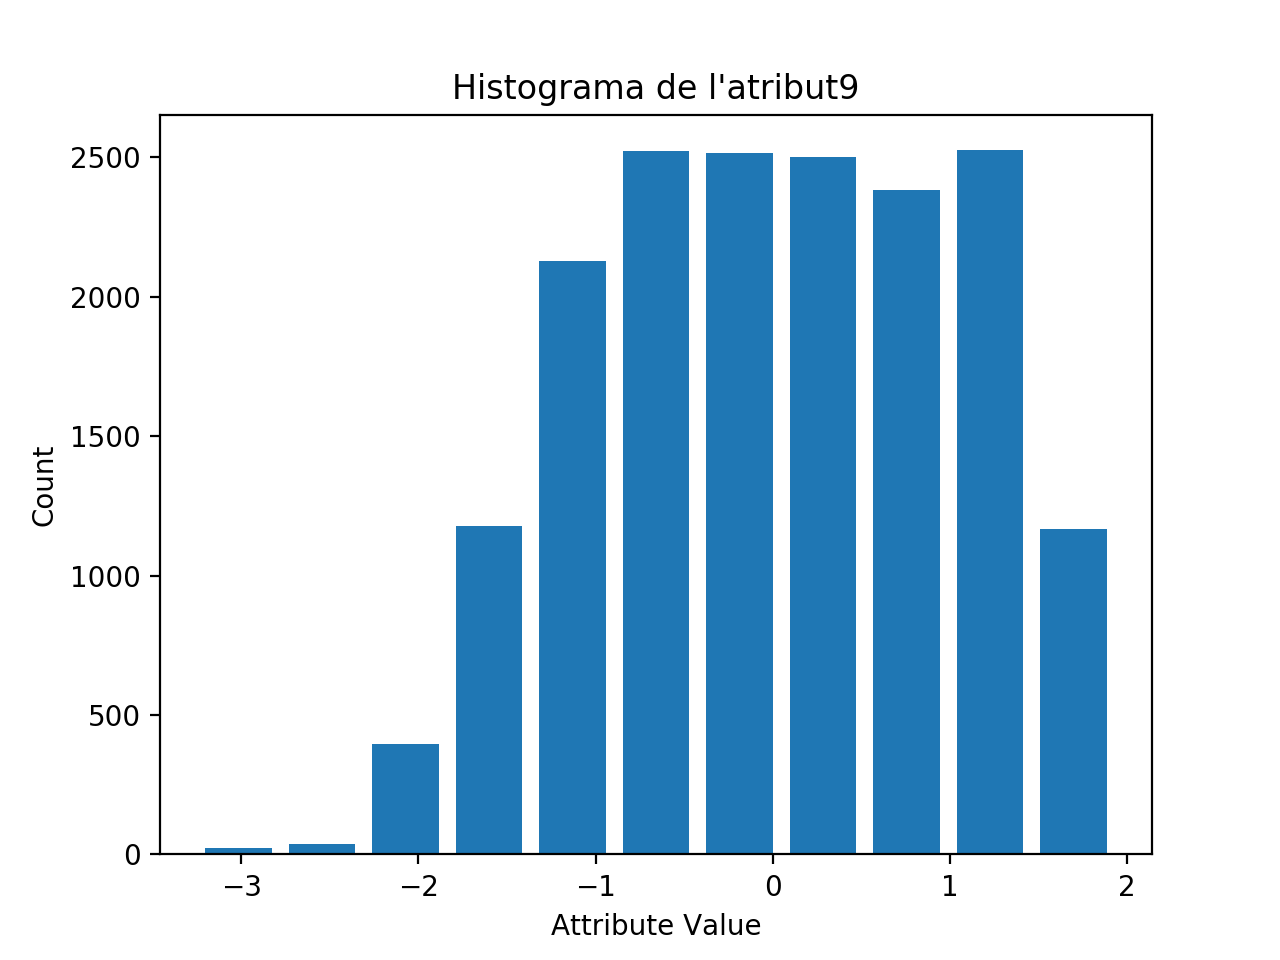

<IPython.core.display.Javascript object>


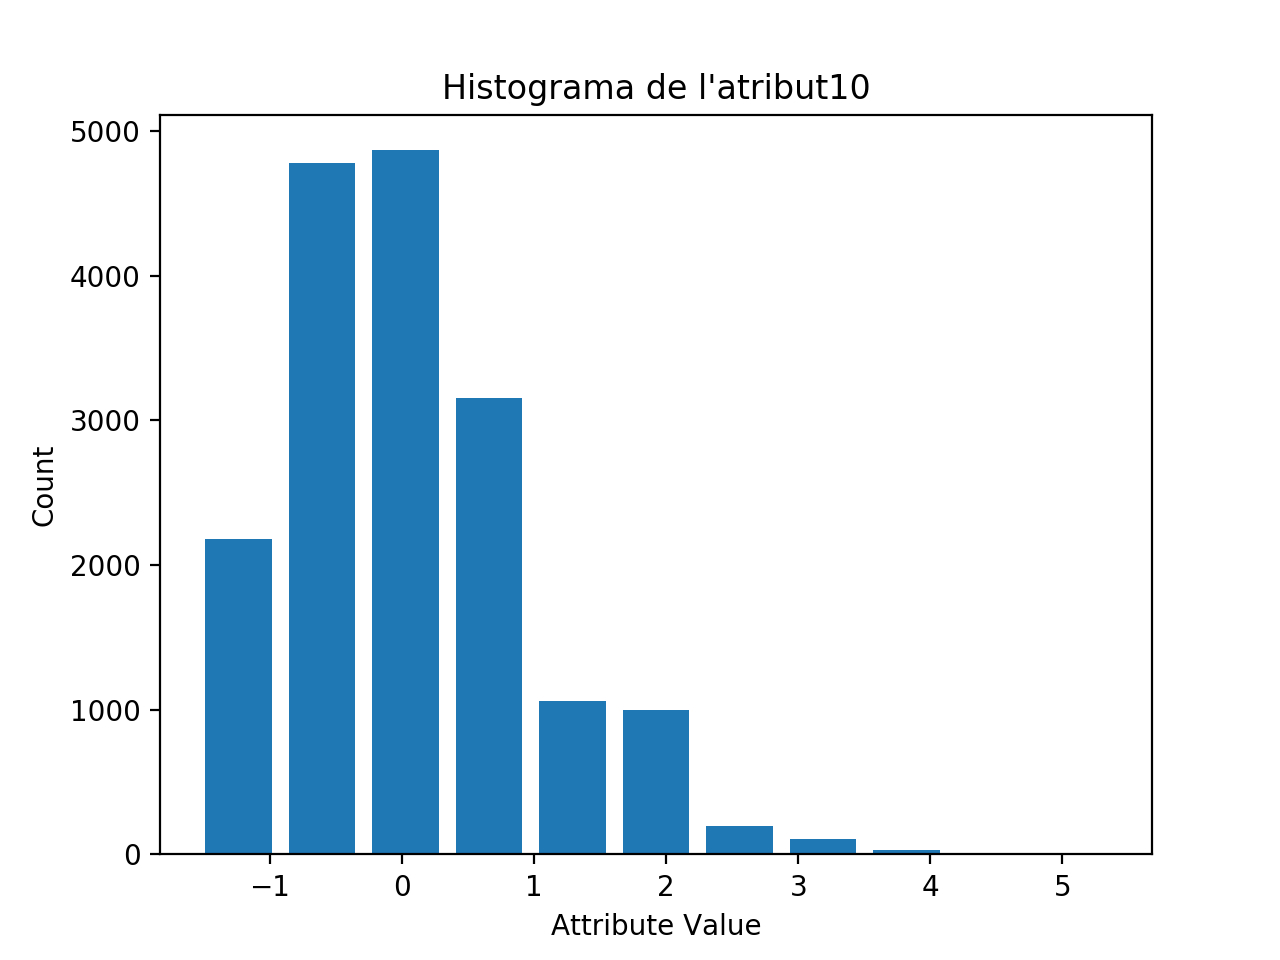

<IPython.core.display.Javascript object>


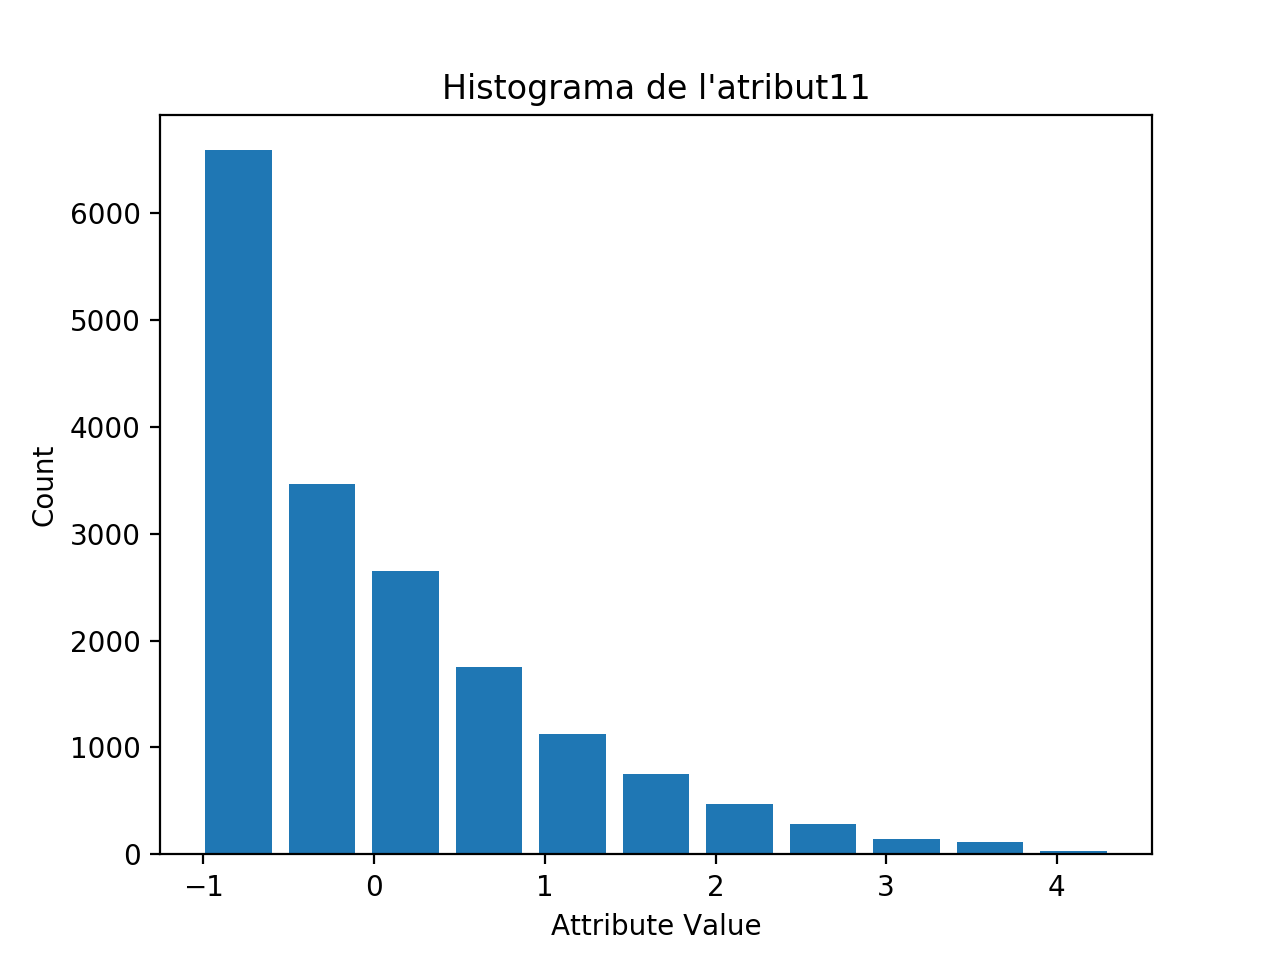

In [15]:
x = np.array(dataset.values)
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(dataset.values)
#print(dataset.values)

for i in range(12):
    plt.figure()
    plt.title("Histograma de l'atribut"+ str(i))
    plt.xlabel("Attribute Value")
    plt.ylabel("Count")
    hist = plt.hist(x_t[:,i], bins=11, range=[np.min(x_t[:,i]), np.max(x_t[:,i])], histtype="bar", rwidth=0.8)
    




## DESPRÉS DE STANDARIZE
Podem observar que el comportament es similar al que ja teniem, però ara els valors estàn estandaritzats.

**Definim la funció regression, que entrena el model perquè predigui y a partir d'x

In [16]:
from sklearn.linear_model import LinearRegression
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


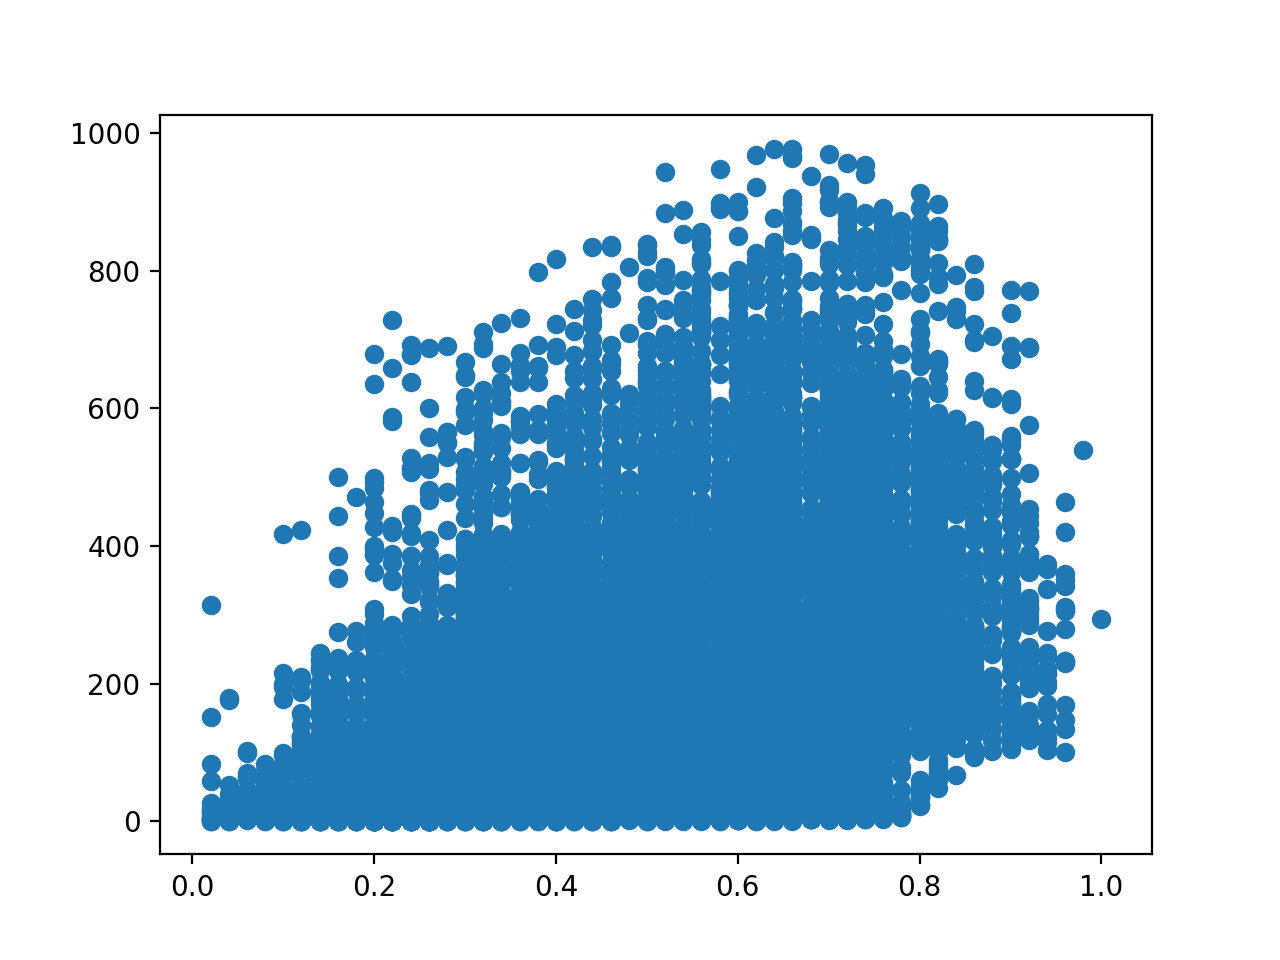

In [17]:
plt.figure()
ax= plt.scatter(x[:,8],y)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


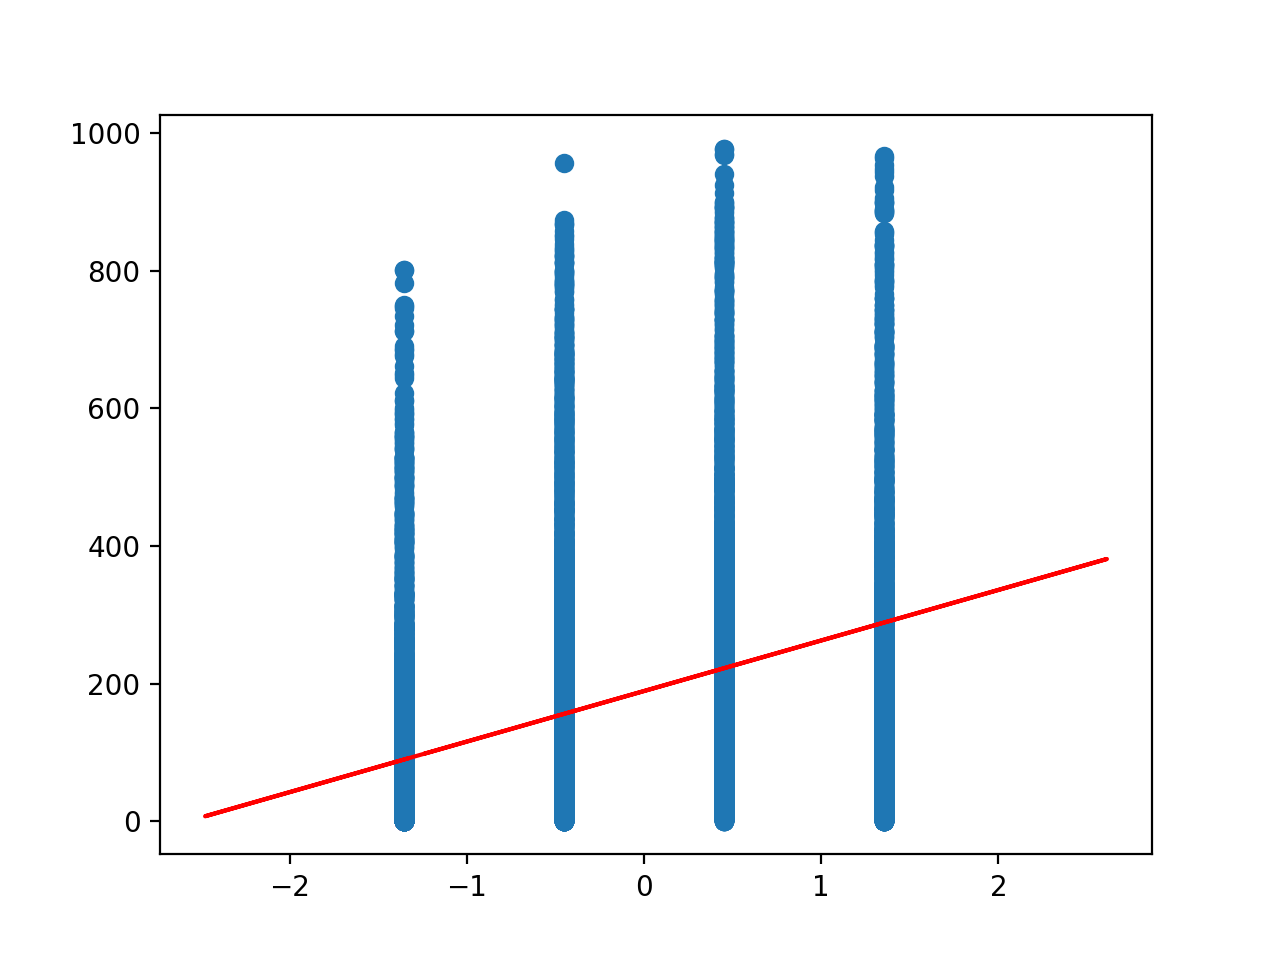

Mean squeared error:  27509.283137975362
R2 score:  0.16384059523903416


In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x_t[:,8].reshape(x_t.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x_t[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


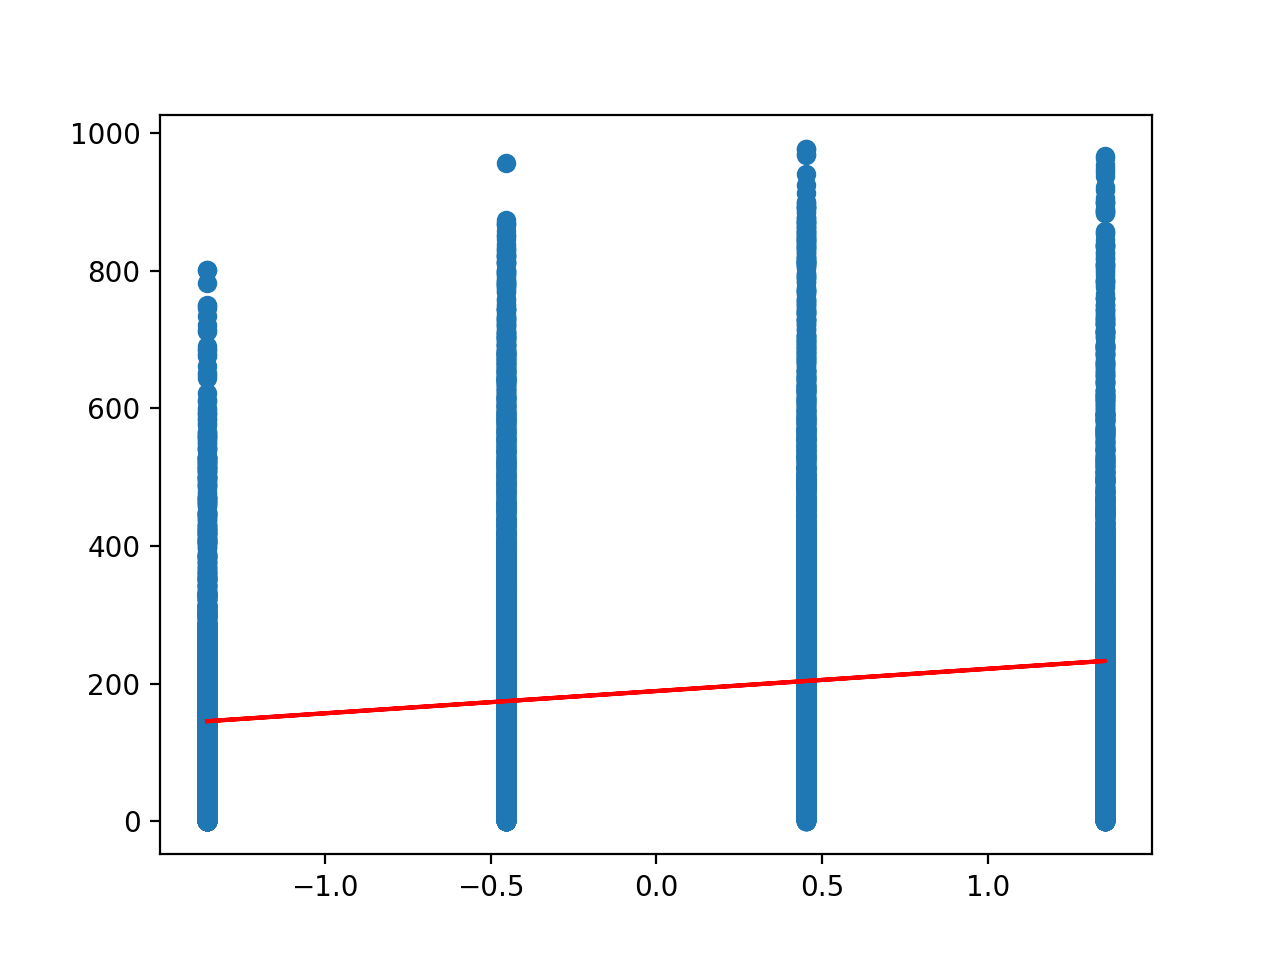

Mean squeared error:  31856.52518338213
R2 score:  0.03170384333577492


In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Extraiem el primer atribut de x i canviem la mida a #exemples, #dimensions de l'atribut.
# En el vostre cas, haureu de triar un atribut com a y, i utilitzar la resta com a x.
atribut1 = x_t[:,0].reshape(x_t.shape[0], 1) 
regr = regression(atribut1, y) 
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x_t[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)


In [20]:
#torno a posar el valor default a les opcions de print perquè si no és una locura
np.set_printoptions(threshold=8)